In [1]:
# n_estimators:[100,150,200,250,300,350,400]：决策树的个数，越多越好，但是性能就会越差，至少100左右（具体数字忘记从哪里来的了）可以达到可接受的性能和误差率。 
# criterion: ["gini","entropy"](default=”gini”)是计算属性的gini(基尼不纯度)还是entropy(信息增益)，来选择最合适的节点。
# max_features: ["auto","sqrt","log2","None"]
# traindata_rate=[0.7,0.8,0.9]
n_estimators=[100,150,200,250,300,350,400]
criterion=["gini","entropy"]
max_features=["auto","sqrt","log2"]
traindata_rate=[0.7,0.8,0.9]

# Fitness Function

In [2]:
import numpy as np
import pandas as pd
from sklearn import cross_validation, ensemble, preprocessing, metrics

def create_chromsom_value_X(filename):
    chromosom_value_X=[]
    ETF_train = pd.read_csv(filename)
    col_list=list(ETF_train.columns)

    for index in range(0,len(col_list)-1):
        chromosom_value_X.append([0,1])
    return chromosom_value_X

def create_chromsom_value_all(filename):
    chromosom_value=create_chromsom_value_X(filename)
    chromosom_value.append(n_estimators)
    chromosom_value.append(criterion)
    chromosom_value.append(max_features)
    chromosom_value.append(traindata_rate)
    return chromosom_value

def create_x_tmp(ETF_train,col_list,chromosome):
    x_tmp=[]
    for index in range(0,len(col_list)-1):
        if chromosome[index] ==1:
            x_tmp.append(ETF_train[col_list[index]])
    return x_tmp

def random_forest_model(filename,chromsome):
    # 載入資料
    ETF_train = pd.read_csv(filename)
    col_list=list(ETF_train.columns)

    n_estimators_c=chromsome[len(col_list)-1]
    criterion_c=chromsome[len(col_list)+0]
    max_features_c=chromsome[len(col_list)+1]
    traindata_rate=chromsome[len(col_list)+2]

    # 建立訓練與測試資料
    x_tmp=create_x_tmp(ETF_train,col_list,chromsome)
    ETF_X = pd.DataFrame(x_tmp).T
    ETF_Y = ETF_train["Y"]

    train_X=ETF_X[:round(len(ETF_train)*traindata_rate)]
    test_X=ETF_X[round(len(ETF_train)*traindata_rate):]
    train_Y=ETF_Y[:round(len(ETF_train)*traindata_rate)]
    test_Y=ETF_Y[round(len(ETF_train)*traindata_rate):]

    # 建立 random forest 模型
    forest = ensemble.RandomForestClassifier(n_estimators = n_estimators_c,criterion=criterion_c,max_features=max_features_c)
    forest_fit = forest.fit(train_X, train_Y)

    # 預測
    test_y_predicted = forest.predict(test_X)

    # 績效
    accuracy = metrics.accuracy_score(test_Y, test_y_predicted)
    return accuracy


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# GA Function

In [3]:
filename='0051_random.csv'
chromosom_value=create_chromsom_value_all(filename)

import random
def createrandomList(create_number,category):
    list_random = [ random.randint(0,category) for i in range(create_number)]
    return(list_random)

#init create population chromosome(100)--function input：filename & population, output：population_list 
def create_population(population):
    population_list=[]
    for popu in range(population):
        chromosome_create=[]
        for index in chromosom_value:
            chromosome_create.append(index[createrandomList(1,len(index)-1)[0]]) #從chromosom_value隨機產生一個值塞到
        population_list.append(chromosome_create)
    return population_list

def cross(cross_rate,chromosome_1,chromosome_2):
    random_rate=random.random()
    if(random_rate>cross_rate):
        point_1=random.randint(0,len(chromosome_1)-1)
        point_2=random.randint(0,len(chromosome_1)-1)

        while(point_1>=point_2):
            point_1=random.randint(0,len(chromosome_1)-1)
            point_2=random.randint(0,len(chromosome_1)-1)

        print("cross_point1: "+str(point_1))
        print("cross_point2: "+str(point_2))
#         print("cross_len_chromosome_1= "+str(len(chromosome_1)))
#         print("cross_len_chromosome_2= "+str(len(chromosome_2)))

        tmp=0
        for index in range(point_1,point_2+1):
            tmp=chromosome_1[index]
            chromosome_1[index]=chromosome_2[index]
            chromosome_2[index]=tmp
    return chromosome_1

def mutation(mutation_rate,chromosome):
    random_rate=random.random()
    if(random_rate>mutation_rate):
        print("mutation_start")
        point_1=random.randint(0,len(chromosome)-1)#產生二個隨機point1 & point2 為了到時候mutation
        point_2=random.randint(0,len(chromosome)-1)
        while(point_1==point_2):#如果point1 point2 一樣要重新產生
            point_1=random.randint(0,len(chromosome)-1)
            point_2=random.randint(0,len(chromosome)-1)
        print("mu_point1= "+str(point_1))
        print("mu_point2= "+str(point_2))

        tmp=chromosome[point_1]#改變染色體中第point1的值，如果產生的新值與舊的一樣要再重新產生
        #chromosome[point_1]值等於chromosom_value裡面隨機產生的一個值createrandomList(1,len(chromosom_value[point_1])-1)[0]
        chromosome[point_1]=chromosom_value[point_1][createrandomList(1,len(chromosom_value[point_1])-1)[0]]#
        while(tmp==chromosome[point_1]):
            chromosome[point_1]=chromosom_value[point_1][createrandomList(1,len(chromosom_value[point_1])-1)[0]]

        tmp_2=chromosome[point_2]#改變染色體中第point2的值，如果產生的新值與舊的一樣要再重新產生
        chromosome[point_2]=chromosom_value[point_2][createrandomList(1,len(chromosom_value[point_2])-1)[0]]
        while(tmp_2==chromosome[point_2]):
            chromosome[point_2]=chromosom_value[point_2][createrandomList(1,len(chromosom_value[point_2])-1)[0]]
    return chromosome

def calculateY_rank(rank_number,population_list,filename):
    result_all_x_fitness=[]#記錄所有population與產生的y
    best_result=[]#記錄最好的population&y

    for index in population_list:
        fitness_value=random_forest_model(filename,index)#calculate fintness_value
        result_all_x_fitness.append([fitness_value,index])
    
    result_rank=[]#record before rank"s x & fitness_value
    for index in range(0,rank_number):
        result_rank.append(sorted(result_all_x_fitness,reverse=True)[index])#sort:big->small
    best_result=result_rank[0]
    
    x_final=[]#記錄前十五名的染色體
    for index in result_rank:
        x_final.append(index[1])
    return [x_final,best_result]

#產生新的X(上一代最好的前15個交配+突變產生新的15個+隨機產生85個新的x)--function
def create_new_x(rank_number,population,cross_rate,mutation_rate,x_final):
    new_x=[]
    #先把前15名的染色體做交配&突變->產生新15個染色體
    for index in range(0,rank_number):
        other_ch=createrandomList(1,rank_number-1)[0]
        while(index==other_ch):
            other_ch=createrandomList(1,rank_number-1)[0] #變矩陣要減1 if index= other_ch -> create other_ch again
        print("i_th chromosome: "+str(index))
        print("other_random_chromosome: "+str(other_ch))
        cross_result=cross(cross_rate,x_final[index],x_final[other_ch])
        new_x.append(mutation(mutation_rate,cross_result))

    #隨機產生第16~100的染色體
    for index in range(0,population-rank_number):
        new_x.append(create_population(1)[0])
    return new_x

# Main: GA+Random Forest

In [11]:
#GA + regression ->main

import datetime
#init parameter
filename='0051_random.csv'
iteration=30
iteration_now=0
population=100
rank_number=10

cross_rate=0.1
mutation_rate=0.1

y_target=20000#fitnessvalue的目標，到達就停止迭代
y_best=-1#目前為止(所有迭代中)最好的fitnessvalue
y_now=-1#當前此迭代中最好的fitnessvalue
x_best=[]

population_list=create_population(population)#產生初始母體染色體

Totalstarttime=datetime.datetime.now()
print("Start GA: "+str(Totalstarttime))
while(not(iteration_now>=iteration or y_best>y_target)):
    iteration_now=iteration_now+1
    print("\niteration_now= "+str(iteration_now))
    Y=calculateY_rank(rank_number,population_list,filename) #return X_final(前15名的染色體) & best_result(此代最好的fitness跟染色體)
    y_now=Y[1][0]
    print("y_now= "+str(y_now))
    if y_now>y_best:
        y_best=y_now
        x_best=Y[1][1]
        #print("x_best= "+str(x_best))
    print("y_best= "+str(y_best))
    population_list=create_new_x(rank_number,population,cross_rate,mutation_rate,Y[0])

print("iteration_now= "+str(iteration_now))
print("y_best= "+str(y_best))
print("x_best= "+str(x_best))

print("GA's end time is "+str(datetime.datetime.now()))
print("All time spends:  "+str(datetime.datetime.now()-Totalstarttime))


Start GA: 2018-05-22 19:49:44.741924

iteration_now= 1
y_now= 0.56
y_best= 0.56
i_th chromosome: 0
other_random_chromosome: 5
cross_point1: 18
cross_point2: 41
mutation_start
mu_point1= 8
mu_point2= 29
i_th chromosome: 1
other_random_chromosome: 4
cross_point1: 0
cross_point2: 47
mutation_start
mu_point1= 60
mu_point2= 69
i_th chromosome: 2
other_random_chromosome: 5
cross_point1: 47
cross_point2: 56
mutation_start
mu_point1= 17
mu_point2= 42
i_th chromosome: 3
other_random_chromosome: 9
cross_point1: 10
cross_point2: 27
mutation_start
mu_point1= 63
mu_point2= 20
i_th chromosome: 4
other_random_chromosome: 6
cross_point1: 10
cross_point2: 25
mutation_start
mu_point1= 18
mu_point2= 64
i_th chromosome: 5
other_random_chromosome: 7
cross_point1: 42
cross_point2: 67
mutation_start
mu_point1= 22
mu_point2= 10
i_th chromosome: 6
other_random_chromosome: 5
cross_point1: 2
cross_point2: 46
mutation_start
mu_point1= 19
mu_point2= 50
i_th chromosome: 7
other_random_chromosome: 5
mutation_start
m

y_now= 0.56
y_best= 0.57
i_th chromosome: 0
other_random_chromosome: 5
cross_point1: 37
cross_point2: 44
mutation_start
mu_point1= 68
mu_point2= 39
i_th chromosome: 1
other_random_chromosome: 9
cross_point1: 2
cross_point2: 73
mutation_start
mu_point1= 26
mu_point2= 6
i_th chromosome: 2
other_random_chromosome: 0
cross_point1: 1
cross_point2: 6
mutation_start
mu_point1= 74
mu_point2= 61
i_th chromosome: 3
other_random_chromosome: 4
cross_point1: 36
cross_point2: 70
mutation_start
mu_point1= 51
mu_point2= 39
i_th chromosome: 4
other_random_chromosome: 8
cross_point1: 6
cross_point2: 51
mutation_start
mu_point1= 50
mu_point2= 5
i_th chromosome: 5
other_random_chromosome: 3
cross_point1: 5
cross_point2: 61
mutation_start
mu_point1= 51
mu_point2= 7
i_th chromosome: 6
other_random_chromosome: 3
cross_point1: 23
cross_point2: 28
mutation_start
mu_point1= 63
mu_point2= 26
i_th chromosome: 7
other_random_chromosome: 6
cross_point1: 0
cross_point2: 36
mutation_start
mu_point1= 77
mu_point2= 48


y_now= 0.546666666667
y_best= 0.57
i_th chromosome: 0
other_random_chromosome: 1
cross_point1: 25
cross_point2: 71
mutation_start
mu_point1= 15
mu_point2= 12
i_th chromosome: 1
other_random_chromosome: 0
cross_point1: 10
cross_point2: 33
mutation_start
mu_point1= 9
mu_point2= 23
i_th chromosome: 2
other_random_chromosome: 4
cross_point1: 47
cross_point2: 55
mutation_start
mu_point1= 42
mu_point2= 13
i_th chromosome: 3
other_random_chromosome: 9
cross_point1: 45
cross_point2: 51
mutation_start
mu_point1= 5
mu_point2= 64
i_th chromosome: 4
other_random_chromosome: 8
cross_point1: 5
cross_point2: 57
mutation_start
mu_point1= 76
mu_point2= 49
i_th chromosome: 5
other_random_chromosome: 6
cross_point1: 18
cross_point2: 40
mutation_start
mu_point1= 33
mu_point2= 18
i_th chromosome: 6
other_random_chromosome: 8
cross_point1: 3
cross_point2: 60
mutation_start
mu_point1= 74
mu_point2= 40
i_th chromosome: 7
other_random_chromosome: 3
cross_point1: 6
cross_point2: 71
mutation_start
mu_point1= 77


y_now= 0.556666666667
y_best= 0.57
i_th chromosome: 0
other_random_chromosome: 4
cross_point1: 63
cross_point2: 78
mutation_start
mu_point1= 69
mu_point2= 75
i_th chromosome: 1
other_random_chromosome: 6
cross_point1: 74
cross_point2: 75
mutation_start
mu_point1= 28
mu_point2= 27
i_th chromosome: 2
other_random_chromosome: 0
cross_point1: 18
cross_point2: 74
mutation_start
mu_point1= 1
mu_point2= 17
i_th chromosome: 3
other_random_chromosome: 9
cross_point1: 57
cross_point2: 65
mutation_start
mu_point1= 44
mu_point2= 65
i_th chromosome: 4
other_random_chromosome: 6
cross_point1: 27
cross_point2: 31
mutation_start
mu_point1= 57
mu_point2= 22
i_th chromosome: 5
other_random_chromosome: 0
cross_point1: 39
cross_point2: 56
mutation_start
mu_point1= 4
mu_point2= 13
i_th chromosome: 6
other_random_chromosome: 2
cross_point1: 19
cross_point2: 66
mutation_start
mu_point1= 73
mu_point2= 57
i_th chromosome: 7
other_random_chromosome: 9
cross_point1: 32
cross_point2: 70
mutation_start
mu_point1= 

y_now= 0.55
y_best= 0.62
i_th chromosome: 0
other_random_chromosome: 3
cross_point1: 62
cross_point2: 79
i_th chromosome: 1
other_random_chromosome: 0
cross_point1: 0
cross_point2: 75
mutation_start
mu_point1= 17
mu_point2= 25
i_th chromosome: 2
other_random_chromosome: 6
cross_point1: 17
cross_point2: 53
mutation_start
mu_point1= 31
mu_point2= 69
i_th chromosome: 3
other_random_chromosome: 2
cross_point1: 16
cross_point2: 69
mutation_start
mu_point1= 79
mu_point2= 14
i_th chromosome: 4
other_random_chromosome: 1
cross_point1: 46
cross_point2: 56
mutation_start
mu_point1= 13
mu_point2= 2
i_th chromosome: 5
other_random_chromosome: 9
cross_point1: 20
cross_point2: 28
mutation_start
mu_point1= 17
mu_point2= 44
i_th chromosome: 6
other_random_chromosome: 1
cross_point1: 23
cross_point2: 43
mutation_start
mu_point1= 17
mu_point2= 51
i_th chromosome: 7
other_random_chromosome: 4
cross_point1: 16
cross_point2: 75
mutation_start
mu_point1= 8
mu_point2= 30
i_th chromosome: 8
other_random_chrom

In [4]:
X_best=x_best= [1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 100, 'entropy', 'auto', 0.9]
print(x_best)
fitness_value=random_forest_model(filename,x_best)
print(fitness_value)

[1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 100, 'entropy', 'auto', 0.9]
0.54


In [24]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor,export_graphviz
import pydotplus
from IPython.display import Image, display
import IPython
%matplotlib inline
#forest = ensemble.RandomForestClassifier(n_estimators = n_estimators_c,criterion=criterion_c,max_features=max_features_c)
forest=DecisionTreeRegressor(criterion='mse', max_depth=None, random_state=None)
forest.fit(train_X, train_Y)
reg_dot_data = export_graphviz(forest,out_file=None,feature_names=ETF_X.columns)
reg_graph = pydotplus.graph_from_dot_data(reg_dot_data)
#reg_graph.write_png('reg_dt_path.png')
reg_graph.write_jpg("123.jpg")
Image(reg_graph.create_jpg)
#Image(reg_graph.create_png())

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [22]:
import os
import sys
def conda_fix(graph):
        path = os.path.join(sys.base_exec_prefix, "Library", "bin", "graphviz")
        paths = ("dot", "twopi", "neato", "circo", "fdp")
        paths = {p: os.path.join(path, "{}.exe".format(p)) for p in paths}
        graph.set_graphviz_executables(paths)

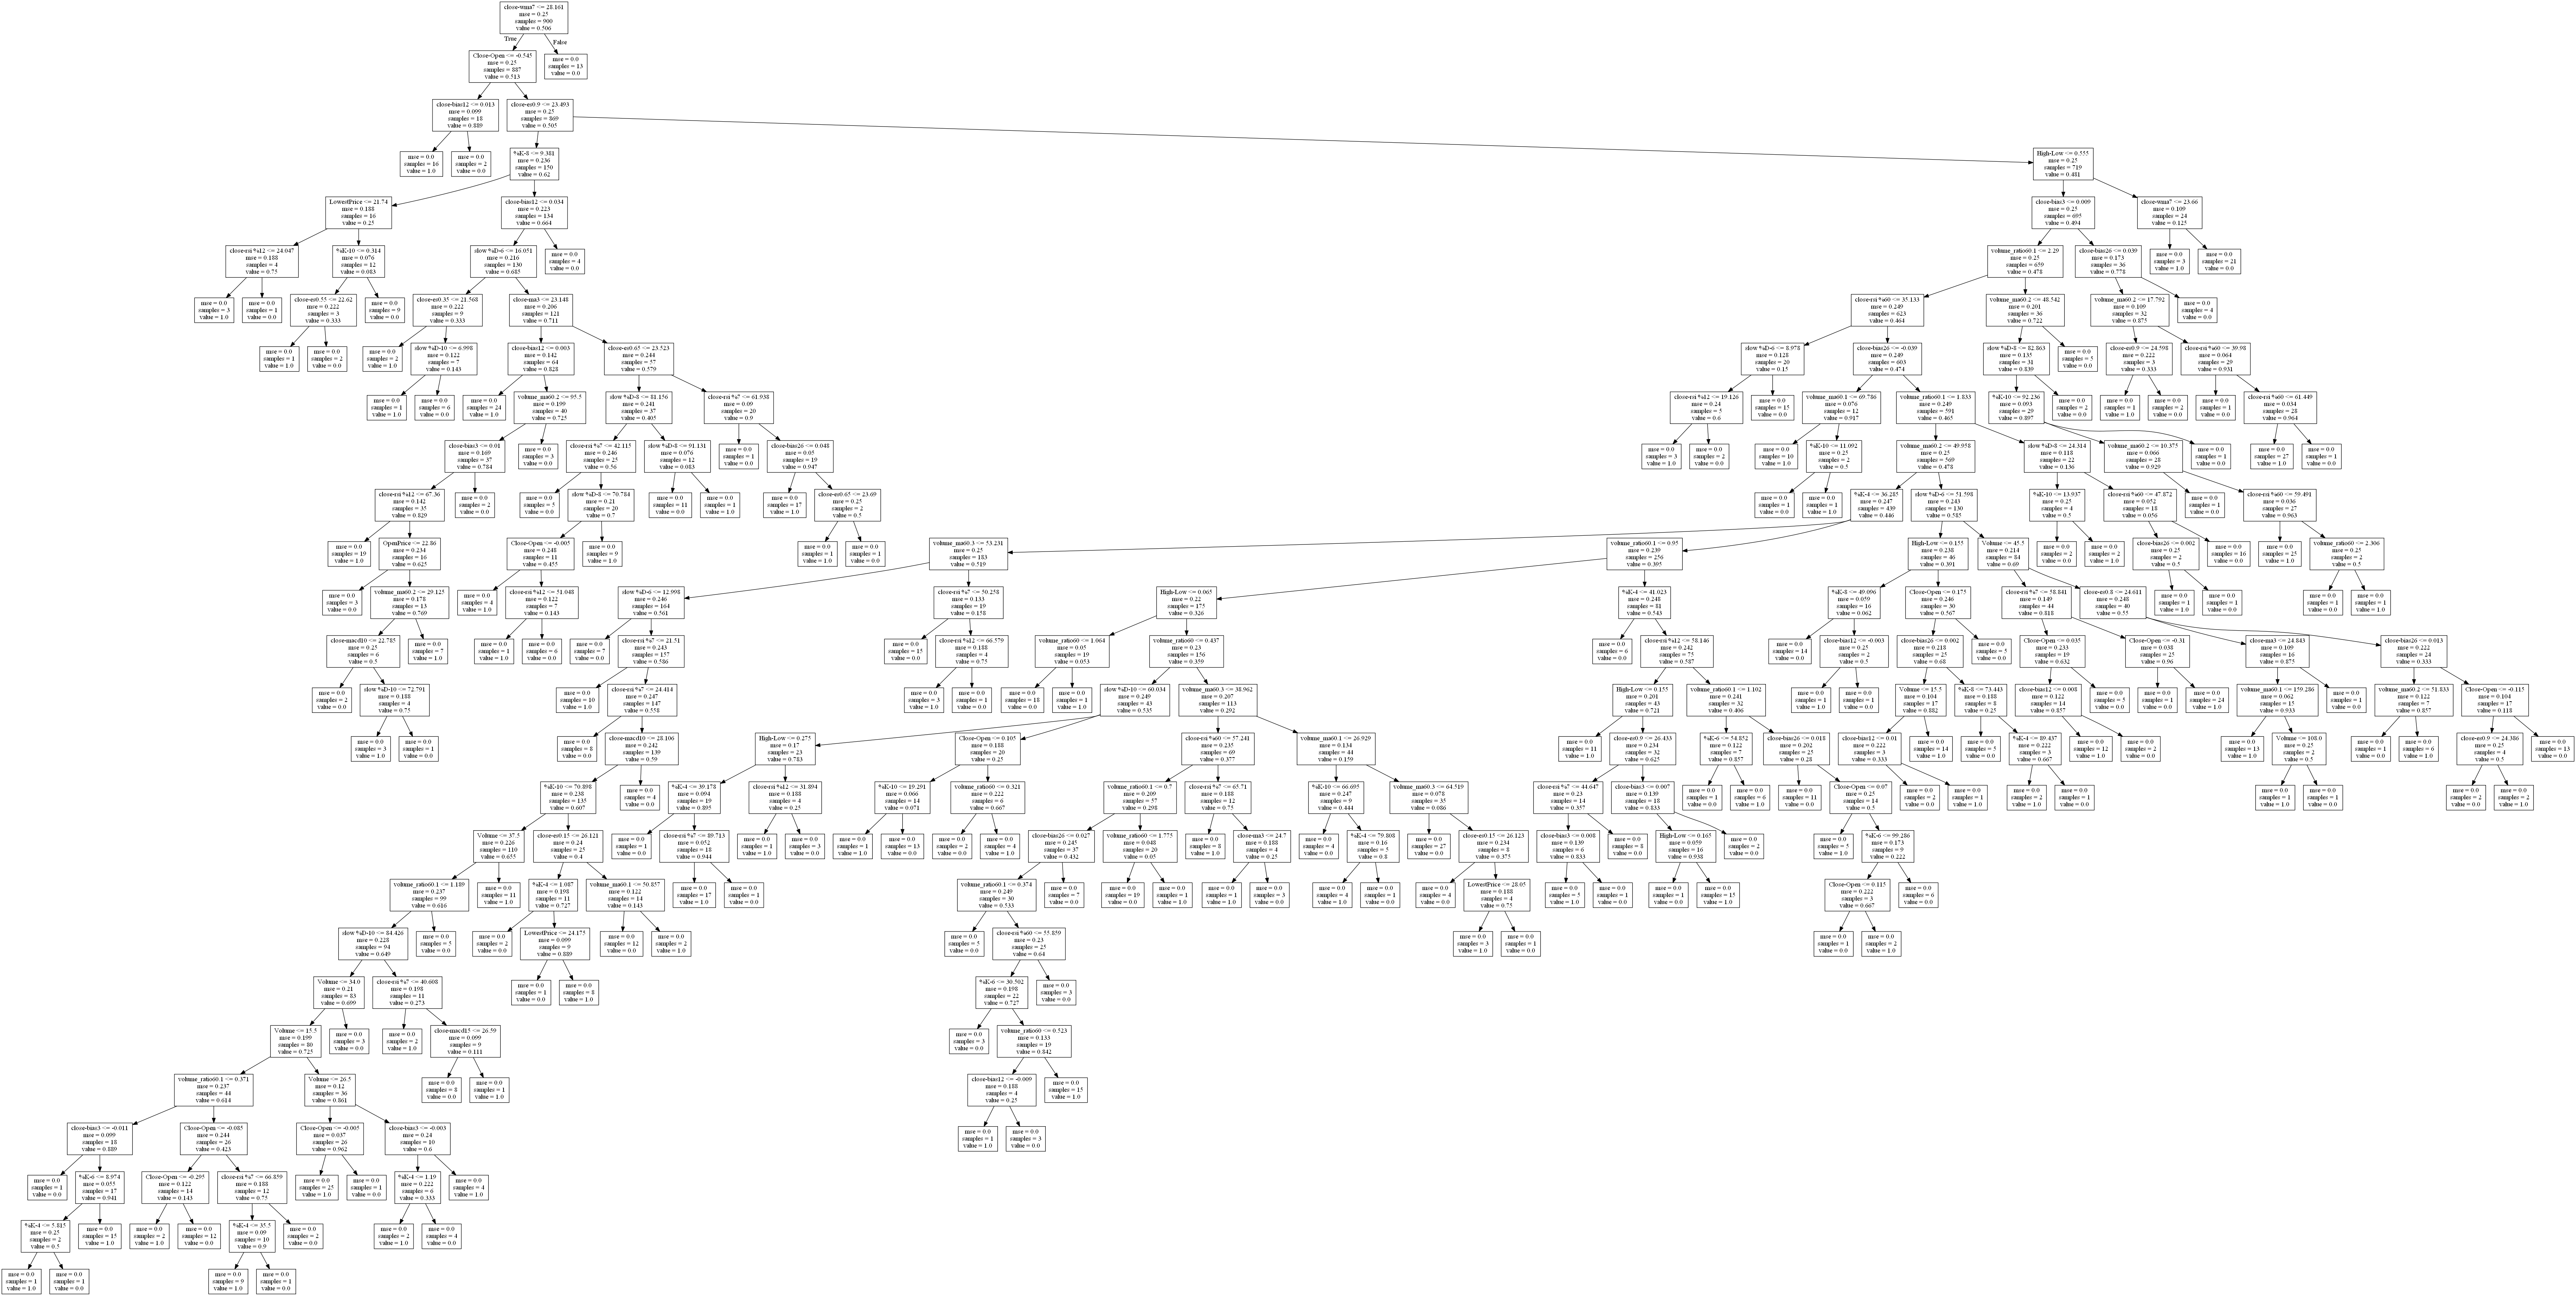

In [29]:
graph = pydotplus.graph_from_dot_data(reg_dot_data)
conda_fix(graph)
Image(graph.create_png())
#reg_graph.write_png(graph.create_png())

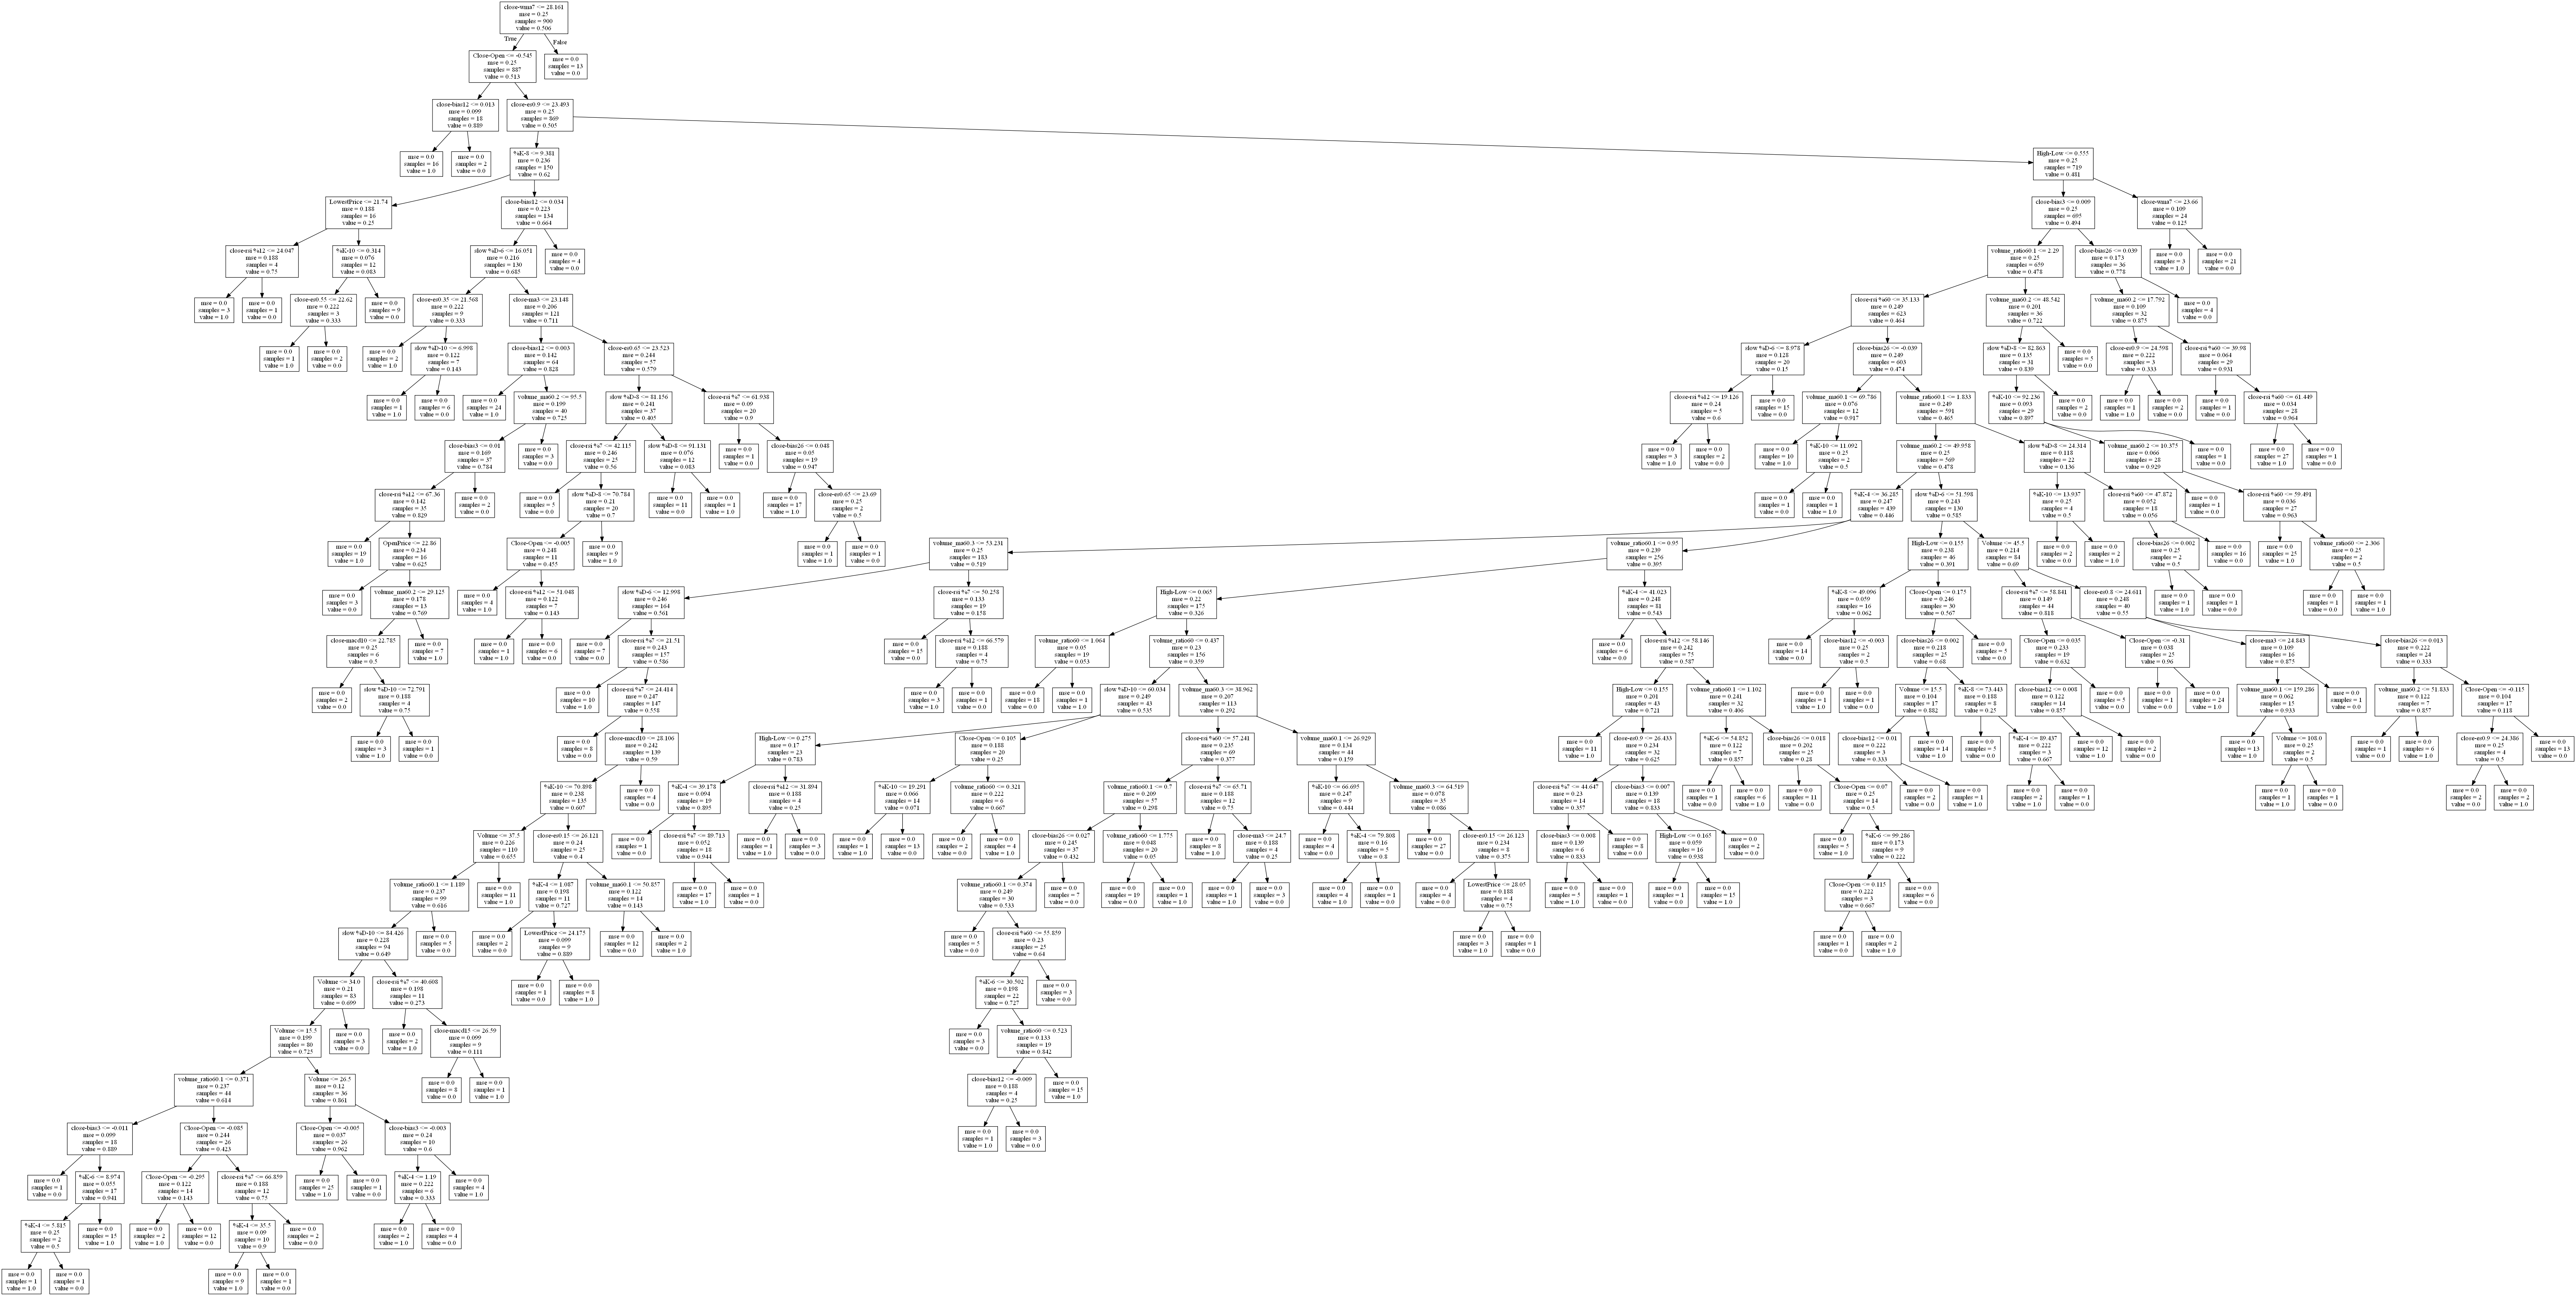

In [30]:
graph = pydotplus.graph_from_dot_data(reg_dot_data)
conda_fix(graph)
Image(graph.create_png())

In [7]:
#def random_forest_model(filename,chromsome):
chromsome=X_best
# 載入資料
ETF_train = pd.read_csv(filename)
col_list=list(ETF_train.columns)

n_estimators_c=chromsome[len(col_list)-1]
criterion_c=chromsome[len(col_list)+0]
max_features_c=chromsome[len(col_list)+1]
traindata_rate=chromsome[len(col_list)+2]

# 建立訓練與測試資料
x_tmp=create_x_tmp(ETF_train,col_list,chromsome)
ETF_X = pd.DataFrame(x_tmp).T
ETF_Y = ETF_train["Y"]

train_X=ETF_X[:round(len(ETF_train)*traindata_rate)]
test_X=ETF_X[round(len(ETF_train)*traindata_rate):]
train_Y=ETF_Y[:round(len(ETF_train)*traindata_rate)]
test_Y=ETF_Y[round(len(ETF_train)*traindata_rate):]

# 建立 random forest 模型
forest = ensemble.RandomForestClassifier(n_estimators = n_estimators_c,criterion=criterion_c,max_features=max_features_c)
forest.fit(train_X, train_Y)
forest_fit = forest.fit(train_X, train_Y)

# 預測
test_y_predicted = forest.predict(test_X)

# 績效
accuracy = metrics.accuracy_score(test_Y, test_y_predicted)
print(accuracy)
    #return accuracy

0.54


In [24]:
print(type(ETF_train.columns))

<class 'pandas.core.indexes.base.Index'>


In [26]:
print(ETF_X.columns)

Index(['OpenPrice', 'LowestPrice', 'Volume', 'High-Low', 'Close-Open',
       'close-rsi %7', 'close-rsi %12', 'close-rsi %60', 'close-ma3',
       'close-bias3', 'close-bias12', 'close-bias26', 'close-wma7',
       'close-es0.0', 'close-es0.15', 'close-es0.35', 'close-es0.4',
       'close-es0.5', 'close-es0.55', 'close-es0.65', 'close-es0.8',
       'close-es0.9', 'close-macd10', 'close-macd15', '%K-4', '%K-6',
       'slow %D-6', '%K-8', 'slow %D-8', '%K-10', 'slow %D-10',
       'close-momentum10', 'volume_ma60.1', 'volume_ma60.2', 'volume_ma60.3',
       'volume_ratio60', 'volume_ratio60.1'],
      dtype='object')


In [25]:
final=0
for index in range(0,10000):
    fit=random_forest_model(filename,x_best)
    print("index= "+str(index))
    print("final_before= "+str(final))
    print("fit_now= "+str(fit))
    if fit>final:
        final=fit
    print("final_after= "+str(final))
print("end")
    

index= 0
final_before= 0
fit_now= 0.45
final_after= 0.45
index= 1
final_before= 0.45
fit_now= 0.58
final_after= 0.58
index= 2
final_before= 0.58
fit_now= 0.4
final_after= 0.58
index= 3
final_before= 0.58
fit_now= 0.52
final_after= 0.58
index= 4
final_before= 0.58
fit_now= 0.49
final_after= 0.58
index= 5
final_before= 0.58
fit_now= 0.49
final_after= 0.58
index= 6
final_before= 0.58
fit_now= 0.53
final_after= 0.58
index= 7
final_before= 0.58
fit_now= 0.51
final_after= 0.58
index= 8
final_before= 0.58
fit_now= 0.56
final_after= 0.58
index= 9
final_before= 0.58
fit_now= 0.53
final_after= 0.58
index= 10
final_before= 0.58
fit_now= 0.5
final_after= 0.58
index= 11
final_before= 0.58
fit_now= 0.49
final_after= 0.58
index= 12
final_before= 0.58
fit_now= 0.51
final_after= 0.58
index= 13
final_before= 0.58
fit_now= 0.47
final_after= 0.58
index= 14
final_before= 0.58
fit_now= 0.52
final_after= 0.58
index= 15
final_before= 0.58
fit_now= 0.52
final_after= 0.58
index= 16
final_before= 0.58
fit_now= 0

index= 135
final_before= 0.58
fit_now= 0.5
final_after= 0.58
index= 136
final_before= 0.58
fit_now= 0.48
final_after= 0.58
index= 137
final_before= 0.58
fit_now= 0.54
final_after= 0.58
index= 138
final_before= 0.58
fit_now= 0.6
final_after= 0.6
index= 139
final_before= 0.6
fit_now= 0.49
final_after= 0.6
index= 140
final_before= 0.6
fit_now= 0.54
final_after= 0.6
index= 141
final_before= 0.6
fit_now= 0.57
final_after= 0.6
index= 142
final_before= 0.6
fit_now= 0.45
final_after= 0.6
index= 143
final_before= 0.6
fit_now= 0.56
final_after= 0.6
index= 144
final_before= 0.6
fit_now= 0.52
final_after= 0.6
index= 145
final_before= 0.6
fit_now= 0.52
final_after= 0.6
index= 146
final_before= 0.6
fit_now= 0.48
final_after= 0.6
index= 147
final_before= 0.6
fit_now= 0.55
final_after= 0.6
index= 148
final_before= 0.6
fit_now= 0.52
final_after= 0.6
index= 149
final_before= 0.6
fit_now= 0.56
final_after= 0.6
index= 150
final_before= 0.6
fit_now= 0.55
final_after= 0.6
index= 151
final_before= 0.6
fit_no

index= 271
final_before= 0.61
fit_now= 0.52
final_after= 0.61
index= 272
final_before= 0.61
fit_now= 0.49
final_after= 0.61
index= 273
final_before= 0.61
fit_now= 0.57
final_after= 0.61
index= 274
final_before= 0.61
fit_now= 0.5
final_after= 0.61
index= 275
final_before= 0.61
fit_now= 0.54
final_after= 0.61
index= 276
final_before= 0.61
fit_now= 0.6
final_after= 0.61
index= 277
final_before= 0.61
fit_now= 0.51
final_after= 0.61
index= 278
final_before= 0.61
fit_now= 0.53
final_after= 0.61
index= 279
final_before= 0.61
fit_now= 0.49
final_after= 0.61
index= 280
final_before= 0.61
fit_now= 0.52
final_after= 0.61
index= 281
final_before= 0.61
fit_now= 0.55
final_after= 0.61
index= 282
final_before= 0.61
fit_now= 0.55
final_after= 0.61
index= 283
final_before= 0.61
fit_now= 0.55
final_after= 0.61
index= 284
final_before= 0.61
fit_now= 0.52
final_after= 0.61
index= 285
final_before= 0.61
fit_now= 0.49
final_after= 0.61
index= 286
final_before= 0.61
fit_now= 0.58
final_after= 0.61
index= 287

index= 404
final_before= 0.62
fit_now= 0.53
final_after= 0.62
index= 405
final_before= 0.62
fit_now= 0.48
final_after= 0.62
index= 406
final_before= 0.62
fit_now= 0.55
final_after= 0.62
index= 407
final_before= 0.62
fit_now= 0.53
final_after= 0.62
index= 408
final_before= 0.62
fit_now= 0.56
final_after= 0.62
index= 409
final_before= 0.62
fit_now= 0.45
final_after= 0.62
index= 410
final_before= 0.62
fit_now= 0.56
final_after= 0.62
index= 411
final_before= 0.62
fit_now= 0.49
final_after= 0.62
index= 412
final_before= 0.62
fit_now= 0.53
final_after= 0.62
index= 413
final_before= 0.62
fit_now= 0.49
final_after= 0.62
index= 414
final_before= 0.62
fit_now= 0.44
final_after= 0.62
index= 415
final_before= 0.62
fit_now= 0.49
final_after= 0.62
index= 416
final_before= 0.62
fit_now= 0.56
final_after= 0.62
index= 417
final_before= 0.62
fit_now= 0.54
final_after= 0.62
index= 418
final_before= 0.62
fit_now= 0.56
final_after= 0.62
index= 419
final_before= 0.62
fit_now= 0.52
final_after= 0.62
index= 4

index= 537
final_before= 0.62
fit_now= 0.53
final_after= 0.62
index= 538
final_before= 0.62
fit_now= 0.62
final_after= 0.62
index= 539
final_before= 0.62
fit_now= 0.5
final_after= 0.62
index= 540
final_before= 0.62
fit_now= 0.52
final_after= 0.62
index= 541
final_before= 0.62
fit_now= 0.47
final_after= 0.62
index= 542
final_before= 0.62
fit_now= 0.53
final_after= 0.62
index= 543
final_before= 0.62
fit_now= 0.52
final_after= 0.62
index= 544
final_before= 0.62
fit_now= 0.56
final_after= 0.62
index= 545
final_before= 0.62
fit_now= 0.51
final_after= 0.62
index= 546
final_before= 0.62
fit_now= 0.55
final_after= 0.62
index= 547
final_before= 0.62
fit_now= 0.5
final_after= 0.62
index= 548
final_before= 0.62
fit_now= 0.51
final_after= 0.62
index= 549
final_before= 0.62
fit_now= 0.58
final_after= 0.62
index= 550
final_before= 0.62
fit_now= 0.49
final_after= 0.62
index= 551
final_before= 0.62
fit_now= 0.59
final_after= 0.62
index= 552
final_before= 0.62
fit_now= 0.52
final_after= 0.62
index= 553

index= 670
final_before= 0.62
fit_now= 0.54
final_after= 0.62
index= 671
final_before= 0.62
fit_now= 0.57
final_after= 0.62
index= 672
final_before= 0.62
fit_now= 0.5
final_after= 0.62
index= 673
final_before= 0.62
fit_now= 0.45
final_after= 0.62
index= 674
final_before= 0.62
fit_now= 0.52
final_after= 0.62
index= 675
final_before= 0.62
fit_now= 0.49
final_after= 0.62
index= 676
final_before= 0.62
fit_now= 0.51
final_after= 0.62
index= 677
final_before= 0.62
fit_now= 0.52
final_after= 0.62
index= 678
final_before= 0.62
fit_now= 0.48
final_after= 0.62
index= 679
final_before= 0.62
fit_now= 0.52
final_after= 0.62
index= 680
final_before= 0.62
fit_now= 0.55
final_after= 0.62
index= 681
final_before= 0.62
fit_now= 0.5
final_after= 0.62
index= 682
final_before= 0.62
fit_now= 0.5
final_after= 0.62
index= 683
final_before= 0.62
fit_now= 0.51
final_after= 0.62
index= 684
final_before= 0.62
fit_now= 0.58
final_after= 0.62
index= 685
final_before= 0.62
fit_now= 0.57
final_after= 0.62
index= 686


index= 803
final_before= 0.62
fit_now= 0.54
final_after= 0.62
index= 804
final_before= 0.62
fit_now= 0.53
final_after= 0.62
index= 805
final_before= 0.62
fit_now= 0.53
final_after= 0.62
index= 806
final_before= 0.62
fit_now= 0.49
final_after= 0.62
index= 807
final_before= 0.62
fit_now= 0.54
final_after= 0.62
index= 808
final_before= 0.62
fit_now= 0.57
final_after= 0.62
index= 809
final_before= 0.62
fit_now= 0.6
final_after= 0.62
index= 810
final_before= 0.62
fit_now= 0.55
final_after= 0.62
index= 811
final_before= 0.62
fit_now= 0.54
final_after= 0.62
index= 812
final_before= 0.62
fit_now= 0.47
final_after= 0.62
index= 813
final_before= 0.62
fit_now= 0.48
final_after= 0.62
index= 814
final_before= 0.62
fit_now= 0.44
final_after= 0.62
index= 815
final_before= 0.62
fit_now= 0.48
final_after= 0.62
index= 816
final_before= 0.62
fit_now= 0.43
final_after= 0.62
index= 817
final_before= 0.62
fit_now= 0.53
final_after= 0.62
index= 818
final_before= 0.62
fit_now= 0.5
final_after= 0.62
index= 819

index= 936
final_before= 0.62
fit_now= 0.44
final_after= 0.62
index= 937
final_before= 0.62
fit_now= 0.61
final_after= 0.62
index= 938
final_before= 0.62
fit_now= 0.49
final_after= 0.62
index= 939
final_before= 0.62
fit_now= 0.55
final_after= 0.62
index= 940
final_before= 0.62
fit_now= 0.52
final_after= 0.62
index= 941
final_before= 0.62
fit_now= 0.58
final_after= 0.62
index= 942
final_before= 0.62
fit_now= 0.53
final_after= 0.62
index= 943
final_before= 0.62
fit_now= 0.5
final_after= 0.62
index= 944
final_before= 0.62
fit_now= 0.51
final_after= 0.62
index= 945
final_before= 0.62
fit_now= 0.49
final_after= 0.62
index= 946
final_before= 0.62
fit_now= 0.56
final_after= 0.62
index= 947
final_before= 0.62
fit_now= 0.5
final_after= 0.62
index= 948
final_before= 0.62
fit_now= 0.51
final_after= 0.62
index= 949
final_before= 0.62
fit_now= 0.52
final_after= 0.62
index= 950
final_before= 0.62
fit_now= 0.5
final_after= 0.62
index= 951
final_before= 0.62
fit_now= 0.57
final_after= 0.62
index= 952


index= 1068
final_before= 0.62
fit_now= 0.52
final_after= 0.62
index= 1069
final_before= 0.62
fit_now= 0.59
final_after= 0.62
index= 1070
final_before= 0.62
fit_now= 0.48
final_after= 0.62
index= 1071
final_before= 0.62
fit_now= 0.51
final_after= 0.62
index= 1072
final_before= 0.62
fit_now= 0.46
final_after= 0.62
index= 1073
final_before= 0.62
fit_now= 0.53
final_after= 0.62
index= 1074
final_before= 0.62
fit_now= 0.53
final_after= 0.62
index= 1075
final_before= 0.62
fit_now= 0.43
final_after= 0.62
index= 1076
final_before= 0.62
fit_now= 0.54
final_after= 0.62
index= 1077
final_before= 0.62
fit_now= 0.53
final_after= 0.62
index= 1078
final_before= 0.62
fit_now= 0.46
final_after= 0.62
index= 1079
final_before= 0.62
fit_now= 0.47
final_after= 0.62
index= 1080
final_before= 0.62
fit_now= 0.53
final_after= 0.62
index= 1081
final_before= 0.62
fit_now= 0.52
final_after= 0.62
index= 1082
final_before= 0.62
fit_now= 0.5
final_after= 0.62
index= 1083
final_before= 0.62
fit_now= 0.58
final_after

index= 1199
final_before= 0.62
fit_now= 0.54
final_after= 0.62
index= 1200
final_before= 0.62
fit_now= 0.51
final_after= 0.62
index= 1201
final_before= 0.62
fit_now= 0.51
final_after= 0.62
index= 1202
final_before= 0.62
fit_now= 0.5
final_after= 0.62
index= 1203
final_before= 0.62
fit_now= 0.53
final_after= 0.62
index= 1204
final_before= 0.62
fit_now= 0.55
final_after= 0.62
index= 1205
final_before= 0.62
fit_now= 0.54
final_after= 0.62
index= 1206
final_before= 0.62
fit_now= 0.55
final_after= 0.62
index= 1207
final_before= 0.62
fit_now= 0.56
final_after= 0.62
index= 1208
final_before= 0.62
fit_now= 0.5
final_after= 0.62
index= 1209
final_before= 0.62
fit_now= 0.53
final_after= 0.62
index= 1210
final_before= 0.62
fit_now= 0.46
final_after= 0.62
index= 1211
final_before= 0.62
fit_now= 0.46
final_after= 0.62
index= 1212
final_before= 0.62
fit_now= 0.47
final_after= 0.62
index= 1213
final_before= 0.62
fit_now= 0.53
final_after= 0.62
index= 1214
final_before= 0.62
fit_now= 0.48
final_after=

index= 1330
final_before= 0.62
fit_now= 0.52
final_after= 0.62
index= 1331
final_before= 0.62
fit_now= 0.47
final_after= 0.62
index= 1332
final_before= 0.62
fit_now= 0.54
final_after= 0.62
index= 1333
final_before= 0.62
fit_now= 0.48
final_after= 0.62
index= 1334
final_before= 0.62
fit_now= 0.5
final_after= 0.62
index= 1335
final_before= 0.62
fit_now= 0.55
final_after= 0.62
index= 1336
final_before= 0.62
fit_now= 0.51
final_after= 0.62
index= 1337
final_before= 0.62
fit_now= 0.52
final_after= 0.62
index= 1338
final_before= 0.62
fit_now= 0.62
final_after= 0.62
index= 1339
final_before= 0.62
fit_now= 0.55
final_after= 0.62
index= 1340
final_before= 0.62
fit_now= 0.49
final_after= 0.62
index= 1341
final_before= 0.62
fit_now= 0.51
final_after= 0.62
index= 1342
final_before= 0.62
fit_now= 0.49
final_after= 0.62
index= 1343
final_before= 0.62
fit_now= 0.52
final_after= 0.62
index= 1344
final_before= 0.62
fit_now= 0.5
final_after= 0.62
index= 1345
final_before= 0.62
fit_now= 0.45
final_after=

index= 1461
final_before= 0.63
fit_now= 0.52
final_after= 0.63
index= 1462
final_before= 0.63
fit_now= 0.48
final_after= 0.63
index= 1463
final_before= 0.63
fit_now= 0.5
final_after= 0.63
index= 1464
final_before= 0.63
fit_now= 0.53
final_after= 0.63
index= 1465
final_before= 0.63
fit_now= 0.5
final_after= 0.63
index= 1466
final_before= 0.63
fit_now= 0.57
final_after= 0.63
index= 1467
final_before= 0.63
fit_now= 0.51
final_after= 0.63
index= 1468
final_before= 0.63
fit_now= 0.51
final_after= 0.63
index= 1469
final_before= 0.63
fit_now= 0.5
final_after= 0.63
index= 1470
final_before= 0.63
fit_now= 0.51
final_after= 0.63
index= 1471
final_before= 0.63
fit_now= 0.54
final_after= 0.63
index= 1472
final_before= 0.63
fit_now= 0.59
final_after= 0.63
index= 1473
final_before= 0.63
fit_now= 0.53
final_after= 0.63
index= 1474
final_before= 0.63
fit_now= 0.53
final_after= 0.63
index= 1475
final_before= 0.63
fit_now= 0.56
final_after= 0.63
index= 1476
final_before= 0.63
fit_now= 0.53
final_after= 

index= 1592
final_before= 0.63
fit_now= 0.49
final_after= 0.63
index= 1593
final_before= 0.63
fit_now= 0.56
final_after= 0.63
index= 1594
final_before= 0.63
fit_now= 0.51
final_after= 0.63
index= 1595
final_before= 0.63
fit_now= 0.56
final_after= 0.63
index= 1596
final_before= 0.63
fit_now= 0.53
final_after= 0.63
index= 1597
final_before= 0.63
fit_now= 0.52
final_after= 0.63
index= 1598
final_before= 0.63
fit_now= 0.51
final_after= 0.63
index= 1599
final_before= 0.63
fit_now= 0.47
final_after= 0.63
index= 1600
final_before= 0.63
fit_now= 0.52
final_after= 0.63
index= 1601
final_before= 0.63
fit_now= 0.52
final_after= 0.63
index= 1602
final_before= 0.63
fit_now= 0.5
final_after= 0.63
index= 1603
final_before= 0.63
fit_now= 0.51
final_after= 0.63
index= 1604
final_before= 0.63
fit_now= 0.52
final_after= 0.63
index= 1605
final_before= 0.63
fit_now= 0.47
final_after= 0.63
index= 1606
final_before= 0.63
fit_now= 0.57
final_after= 0.63
index= 1607
final_before= 0.63
fit_now= 0.55
final_after

index= 1723
final_before= 0.63
fit_now= 0.44
final_after= 0.63
index= 1724
final_before= 0.63
fit_now= 0.53
final_after= 0.63
index= 1725
final_before= 0.63
fit_now= 0.52
final_after= 0.63
index= 1726
final_before= 0.63
fit_now= 0.55
final_after= 0.63
index= 1727
final_before= 0.63
fit_now= 0.49
final_after= 0.63
index= 1728
final_before= 0.63
fit_now= 0.53
final_after= 0.63
index= 1729
final_before= 0.63
fit_now= 0.48
final_after= 0.63
index= 1730
final_before= 0.63
fit_now= 0.52
final_after= 0.63
index= 1731
final_before= 0.63
fit_now= 0.49
final_after= 0.63
index= 1732
final_before= 0.63
fit_now= 0.5
final_after= 0.63
index= 1733
final_before= 0.63
fit_now= 0.5
final_after= 0.63
index= 1734
final_before= 0.63
fit_now= 0.49
final_after= 0.63
index= 1735
final_before= 0.63
fit_now= 0.56
final_after= 0.63
index= 1736
final_before= 0.63
fit_now= 0.47
final_after= 0.63
index= 1737
final_before= 0.63
fit_now= 0.49
final_after= 0.63
index= 1738
final_before= 0.63
fit_now= 0.51
final_after=

index= 1854
final_before= 0.63
fit_now= 0.53
final_after= 0.63
index= 1855
final_before= 0.63
fit_now= 0.52
final_after= 0.63
index= 1856
final_before= 0.63
fit_now= 0.55
final_after= 0.63
index= 1857
final_before= 0.63
fit_now= 0.46
final_after= 0.63
index= 1858
final_before= 0.63
fit_now= 0.51
final_after= 0.63
index= 1859
final_before= 0.63
fit_now= 0.52
final_after= 0.63
index= 1860
final_before= 0.63
fit_now= 0.44
final_after= 0.63
index= 1861
final_before= 0.63
fit_now= 0.54
final_after= 0.63
index= 1862
final_before= 0.63
fit_now= 0.5
final_after= 0.63
index= 1863
final_before= 0.63
fit_now= 0.46
final_after= 0.63
index= 1864
final_before= 0.63
fit_now= 0.49
final_after= 0.63
index= 1865
final_before= 0.63
fit_now= 0.46
final_after= 0.63
index= 1866
final_before= 0.63
fit_now= 0.57
final_after= 0.63
index= 1867
final_before= 0.63
fit_now= 0.46
final_after= 0.63
index= 1868
final_before= 0.63
fit_now= 0.52
final_after= 0.63
index= 1869
final_before= 0.63
fit_now= 0.49
final_after

index= 1985
final_before= 0.63
fit_now= 0.46
final_after= 0.63
index= 1986
final_before= 0.63
fit_now= 0.52
final_after= 0.63
index= 1987
final_before= 0.63
fit_now= 0.45
final_after= 0.63
index= 1988
final_before= 0.63
fit_now= 0.49
final_after= 0.63
index= 1989
final_before= 0.63
fit_now= 0.49
final_after= 0.63
index= 1990
final_before= 0.63
fit_now= 0.45
final_after= 0.63
index= 1991
final_before= 0.63
fit_now= 0.53
final_after= 0.63
index= 1992
final_before= 0.63
fit_now= 0.47
final_after= 0.63
index= 1993
final_before= 0.63
fit_now= 0.52
final_after= 0.63
index= 1994
final_before= 0.63
fit_now= 0.46
final_after= 0.63
index= 1995
final_before= 0.63
fit_now= 0.49
final_after= 0.63
index= 1996
final_before= 0.63
fit_now= 0.53
final_after= 0.63
index= 1997
final_before= 0.63
fit_now= 0.49
final_after= 0.63
index= 1998
final_before= 0.63
fit_now= 0.49
final_after= 0.63
index= 1999
final_before= 0.63
fit_now= 0.53
final_after= 0.63
index= 2000
final_before= 0.63
fit_now= 0.49
final_afte

index= 2116
final_before= 0.63
fit_now= 0.49
final_after= 0.63
index= 2117
final_before= 0.63
fit_now= 0.52
final_after= 0.63
index= 2118
final_before= 0.63
fit_now= 0.54
final_after= 0.63
index= 2119
final_before= 0.63
fit_now= 0.49
final_after= 0.63
index= 2120
final_before= 0.63
fit_now= 0.51
final_after= 0.63
index= 2121
final_before= 0.63
fit_now= 0.49
final_after= 0.63
index= 2122
final_before= 0.63
fit_now= 0.51
final_after= 0.63
index= 2123
final_before= 0.63
fit_now= 0.5
final_after= 0.63
index= 2124
final_before= 0.63
fit_now= 0.49
final_after= 0.63
index= 2125
final_before= 0.63
fit_now= 0.57
final_after= 0.63
index= 2126
final_before= 0.63
fit_now= 0.58
final_after= 0.63
index= 2127
final_before= 0.63
fit_now= 0.5
final_after= 0.63
index= 2128
final_before= 0.63
fit_now= 0.52
final_after= 0.63
index= 2129
final_before= 0.63
fit_now= 0.5
final_after= 0.63
index= 2130
final_before= 0.63
fit_now= 0.48
final_after= 0.63
index= 2131
final_before= 0.63
fit_now= 0.52
final_after= 

index= 2247
final_before= 0.64
fit_now= 0.43
final_after= 0.64
index= 2248
final_before= 0.64
fit_now= 0.57
final_after= 0.64
index= 2249
final_before= 0.64
fit_now= 0.46
final_after= 0.64
index= 2250
final_before= 0.64
fit_now= 0.53
final_after= 0.64
index= 2251
final_before= 0.64
fit_now= 0.51
final_after= 0.64
index= 2252
final_before= 0.64
fit_now= 0.48
final_after= 0.64
index= 2253
final_before= 0.64
fit_now= 0.52
final_after= 0.64
index= 2254
final_before= 0.64
fit_now= 0.51
final_after= 0.64
index= 2255
final_before= 0.64
fit_now= 0.48
final_after= 0.64
index= 2256
final_before= 0.64
fit_now= 0.53
final_after= 0.64
index= 2257
final_before= 0.64
fit_now= 0.51
final_after= 0.64
index= 2258
final_before= 0.64
fit_now= 0.51
final_after= 0.64
index= 2259
final_before= 0.64
fit_now= 0.52
final_after= 0.64
index= 2260
final_before= 0.64
fit_now= 0.61
final_after= 0.64
index= 2261
final_before= 0.64
fit_now= 0.46
final_after= 0.64
index= 2262
final_before= 0.64
fit_now= 0.49
final_afte

index= 2378
final_before= 0.64
fit_now= 0.53
final_after= 0.64
index= 2379
final_before= 0.64
fit_now= 0.59
final_after= 0.64
index= 2380
final_before= 0.64
fit_now= 0.47
final_after= 0.64
index= 2381
final_before= 0.64
fit_now= 0.49
final_after= 0.64
index= 2382
final_before= 0.64
fit_now= 0.54
final_after= 0.64
index= 2383
final_before= 0.64
fit_now= 0.51
final_after= 0.64
index= 2384
final_before= 0.64
fit_now= 0.57
final_after= 0.64
index= 2385
final_before= 0.64
fit_now= 0.52
final_after= 0.64
index= 2386
final_before= 0.64
fit_now= 0.53
final_after= 0.64
index= 2387
final_before= 0.64
fit_now= 0.52
final_after= 0.64
index= 2388
final_before= 0.64
fit_now= 0.5
final_after= 0.64
index= 2389
final_before= 0.64
fit_now= 0.49
final_after= 0.64
index= 2390
final_before= 0.64
fit_now= 0.47
final_after= 0.64
index= 2391
final_before= 0.64
fit_now= 0.49
final_after= 0.64
index= 2392
final_before= 0.64
fit_now= 0.5
final_after= 0.64
index= 2393
final_before= 0.64
fit_now= 0.56
final_after=

index= 2509
final_before= 0.64
fit_now= 0.58
final_after= 0.64
index= 2510
final_before= 0.64
fit_now= 0.51
final_after= 0.64
index= 2511
final_before= 0.64
fit_now= 0.5
final_after= 0.64
index= 2512
final_before= 0.64
fit_now= 0.5
final_after= 0.64
index= 2513
final_before= 0.64
fit_now= 0.49
final_after= 0.64
index= 2514
final_before= 0.64
fit_now= 0.52
final_after= 0.64
index= 2515
final_before= 0.64
fit_now= 0.51
final_after= 0.64
index= 2516
final_before= 0.64
fit_now= 0.54
final_after= 0.64
index= 2517
final_before= 0.64
fit_now= 0.48
final_after= 0.64
index= 2518
final_before= 0.64
fit_now= 0.53
final_after= 0.64
index= 2519
final_before= 0.64
fit_now= 0.47
final_after= 0.64
index= 2520
final_before= 0.64
fit_now= 0.53
final_after= 0.64
index= 2521
final_before= 0.64
fit_now= 0.56
final_after= 0.64
index= 2522
final_before= 0.64
fit_now= 0.53
final_after= 0.64
index= 2523
final_before= 0.64
fit_now= 0.55
final_after= 0.64
index= 2524
final_before= 0.64
fit_now= 0.54
final_after=

index= 2640
final_before= 0.64
fit_now= 0.54
final_after= 0.64
index= 2641
final_before= 0.64
fit_now= 0.54
final_after= 0.64
index= 2642
final_before= 0.64
fit_now= 0.48
final_after= 0.64
index= 2643
final_before= 0.64
fit_now= 0.51
final_after= 0.64
index= 2644
final_before= 0.64
fit_now= 0.57
final_after= 0.64
index= 2645
final_before= 0.64
fit_now= 0.54
final_after= 0.64
index= 2646
final_before= 0.64
fit_now= 0.52
final_after= 0.64
index= 2647
final_before= 0.64
fit_now= 0.52
final_after= 0.64
index= 2648
final_before= 0.64
fit_now= 0.51
final_after= 0.64
index= 2649
final_before= 0.64
fit_now= 0.54
final_after= 0.64
index= 2650
final_before= 0.64
fit_now= 0.57
final_after= 0.64
index= 2651
final_before= 0.64
fit_now= 0.57
final_after= 0.64
index= 2652
final_before= 0.64
fit_now= 0.53
final_after= 0.64
index= 2653
final_before= 0.64
fit_now= 0.5
final_after= 0.64
index= 2654
final_before= 0.64
fit_now= 0.58
final_after= 0.64
index= 2655
final_before= 0.64
fit_now= 0.52
final_after

index= 2771
final_before= 0.64
fit_now= 0.56
final_after= 0.64
index= 2772
final_before= 0.64
fit_now= 0.56
final_after= 0.64
index= 2773
final_before= 0.64
fit_now= 0.45
final_after= 0.64
index= 2774
final_before= 0.64
fit_now= 0.51
final_after= 0.64
index= 2775
final_before= 0.64
fit_now= 0.53
final_after= 0.64
index= 2776
final_before= 0.64
fit_now= 0.49
final_after= 0.64
index= 2777
final_before= 0.64
fit_now= 0.46
final_after= 0.64
index= 2778
final_before= 0.64
fit_now= 0.55
final_after= 0.64
index= 2779
final_before= 0.64
fit_now= 0.45
final_after= 0.64
index= 2780
final_before= 0.64
fit_now= 0.48
final_after= 0.64
index= 2781
final_before= 0.64
fit_now= 0.5
final_after= 0.64
index= 2782
final_before= 0.64
fit_now= 0.5
final_after= 0.64
index= 2783
final_before= 0.64
fit_now= 0.5
final_after= 0.64
index= 2784
final_before= 0.64
fit_now= 0.46
final_after= 0.64
index= 2785
final_before= 0.64
fit_now= 0.51
final_after= 0.64
index= 2786
final_before= 0.64
fit_now= 0.55
final_after= 

index= 2902
final_before= 0.64
fit_now= 0.52
final_after= 0.64
index= 2903
final_before= 0.64
fit_now= 0.56
final_after= 0.64
index= 2904
final_before= 0.64
fit_now= 0.56
final_after= 0.64
index= 2905
final_before= 0.64
fit_now= 0.6
final_after= 0.64
index= 2906
final_before= 0.64
fit_now= 0.52
final_after= 0.64
index= 2907
final_before= 0.64
fit_now= 0.49
final_after= 0.64
index= 2908
final_before= 0.64
fit_now= 0.57
final_after= 0.64
index= 2909
final_before= 0.64
fit_now= 0.55
final_after= 0.64
index= 2910
final_before= 0.64
fit_now= 0.5
final_after= 0.64
index= 2911
final_before= 0.64
fit_now= 0.51
final_after= 0.64
index= 2912
final_before= 0.64
fit_now= 0.53
final_after= 0.64
index= 2913
final_before= 0.64
fit_now= 0.52
final_after= 0.64
index= 2914
final_before= 0.64
fit_now= 0.52
final_after= 0.64
index= 2915
final_before= 0.64
fit_now= 0.51
final_after= 0.64
index= 2916
final_before= 0.64
fit_now= 0.48
final_after= 0.64
index= 2917
final_before= 0.64
fit_now= 0.54
final_after=

index= 3033
final_before= 0.64
fit_now= 0.45
final_after= 0.64
index= 3034
final_before= 0.64
fit_now= 0.52
final_after= 0.64
index= 3035
final_before= 0.64
fit_now= 0.54
final_after= 0.64
index= 3036
final_before= 0.64
fit_now= 0.52
final_after= 0.64
index= 3037
final_before= 0.64
fit_now= 0.51
final_after= 0.64
index= 3038
final_before= 0.64
fit_now= 0.56
final_after= 0.64
index= 3039
final_before= 0.64
fit_now= 0.56
final_after= 0.64
index= 3040
final_before= 0.64
fit_now= 0.53
final_after= 0.64
index= 3041
final_before= 0.64
fit_now= 0.48
final_after= 0.64
index= 3042
final_before= 0.64
fit_now= 0.58
final_after= 0.64
index= 3043
final_before= 0.64
fit_now= 0.52
final_after= 0.64
index= 3044
final_before= 0.64
fit_now= 0.48
final_after= 0.64
index= 3045
final_before= 0.64
fit_now= 0.49
final_after= 0.64
index= 3046
final_before= 0.64
fit_now= 0.49
final_after= 0.64
index= 3047
final_before= 0.64
fit_now= 0.52
final_after= 0.64
index= 3048
final_before= 0.64
fit_now= 0.54
final_afte

index= 3164
final_before= 0.64
fit_now= 0.59
final_after= 0.64
index= 3165
final_before= 0.64
fit_now= 0.49
final_after= 0.64
index= 3166
final_before= 0.64
fit_now= 0.44
final_after= 0.64
index= 3167
final_before= 0.64
fit_now= 0.58
final_after= 0.64
index= 3168
final_before= 0.64
fit_now= 0.56
final_after= 0.64
index= 3169
final_before= 0.64
fit_now= 0.51
final_after= 0.64
index= 3170
final_before= 0.64
fit_now= 0.47
final_after= 0.64
index= 3171
final_before= 0.64
fit_now= 0.58
final_after= 0.64
index= 3172
final_before= 0.64
fit_now= 0.5
final_after= 0.64
index= 3173
final_before= 0.64
fit_now= 0.49
final_after= 0.64
index= 3174
final_before= 0.64
fit_now= 0.55
final_after= 0.64
index= 3175
final_before= 0.64
fit_now= 0.59
final_after= 0.64
index= 3176
final_before= 0.64
fit_now= 0.45
final_after= 0.64
index= 3177
final_before= 0.64
fit_now= 0.53
final_after= 0.64
index= 3178
final_before= 0.64
fit_now= 0.55
final_after= 0.64
index= 3179
final_before= 0.64
fit_now= 0.47
final_after

index= 3295
final_before= 0.64
fit_now= 0.54
final_after= 0.64
index= 3296
final_before= 0.64
fit_now= 0.58
final_after= 0.64
index= 3297
final_before= 0.64
fit_now= 0.53
final_after= 0.64
index= 3298
final_before= 0.64
fit_now= 0.43
final_after= 0.64
index= 3299
final_before= 0.64
fit_now= 0.52
final_after= 0.64
index= 3300
final_before= 0.64
fit_now= 0.48
final_after= 0.64
index= 3301
final_before= 0.64
fit_now= 0.51
final_after= 0.64
index= 3302
final_before= 0.64
fit_now= 0.55
final_after= 0.64
index= 3303
final_before= 0.64
fit_now= 0.48
final_after= 0.64
index= 3304
final_before= 0.64
fit_now= 0.48
final_after= 0.64
index= 3305
final_before= 0.64
fit_now= 0.52
final_after= 0.64
index= 3306
final_before= 0.64
fit_now= 0.54
final_after= 0.64
index= 3307
final_before= 0.64
fit_now= 0.55
final_after= 0.64
index= 3308
final_before= 0.64
fit_now= 0.56
final_after= 0.64
index= 3309
final_before= 0.64
fit_now= 0.54
final_after= 0.64
index= 3310
final_before= 0.64
fit_now= 0.55
final_afte

index= 3426
final_before= 0.64
fit_now= 0.52
final_after= 0.64
index= 3427
final_before= 0.64
fit_now= 0.53
final_after= 0.64
index= 3428
final_before= 0.64
fit_now= 0.46
final_after= 0.64
index= 3429
final_before= 0.64
fit_now= 0.54
final_after= 0.64
index= 3430
final_before= 0.64
fit_now= 0.57
final_after= 0.64
index= 3431
final_before= 0.64
fit_now= 0.43
final_after= 0.64
index= 3432
final_before= 0.64
fit_now= 0.54
final_after= 0.64
index= 3433
final_before= 0.64
fit_now= 0.51
final_after= 0.64
index= 3434
final_before= 0.64
fit_now= 0.49
final_after= 0.64
index= 3435
final_before= 0.64
fit_now= 0.55
final_after= 0.64
index= 3436
final_before= 0.64
fit_now= 0.53
final_after= 0.64
index= 3437
final_before= 0.64
fit_now= 0.53
final_after= 0.64
index= 3438
final_before= 0.64
fit_now= 0.48
final_after= 0.64
index= 3439
final_before= 0.64
fit_now= 0.56
final_after= 0.64
index= 3440
final_before= 0.64
fit_now= 0.5
final_after= 0.64
index= 3441
final_before= 0.64
fit_now= 0.52
final_after

index= 3557
final_before= 0.64
fit_now= 0.49
final_after= 0.64
index= 3558
final_before= 0.64
fit_now= 0.55
final_after= 0.64
index= 3559
final_before= 0.64
fit_now= 0.54
final_after= 0.64
index= 3560
final_before= 0.64
fit_now= 0.56
final_after= 0.64
index= 3561
final_before= 0.64
fit_now= 0.52
final_after= 0.64
index= 3562
final_before= 0.64
fit_now= 0.54
final_after= 0.64
index= 3563
final_before= 0.64
fit_now= 0.55
final_after= 0.64
index= 3564
final_before= 0.64
fit_now= 0.47
final_after= 0.64
index= 3565
final_before= 0.64
fit_now= 0.5
final_after= 0.64
index= 3566
final_before= 0.64
fit_now= 0.56
final_after= 0.64
index= 3567
final_before= 0.64
fit_now= 0.48
final_after= 0.64
index= 3568
final_before= 0.64
fit_now= 0.48
final_after= 0.64
index= 3569
final_before= 0.64
fit_now= 0.48
final_after= 0.64
index= 3570
final_before= 0.64
fit_now= 0.51
final_after= 0.64
index= 3571
final_before= 0.64
fit_now= 0.54
final_after= 0.64
index= 3572
final_before= 0.64
fit_now= 0.49
final_after

index= 3688
final_before= 0.64
fit_now= 0.42
final_after= 0.64
index= 3689
final_before= 0.64
fit_now= 0.58
final_after= 0.64
index= 3690
final_before= 0.64
fit_now= 0.54
final_after= 0.64
index= 3691
final_before= 0.64
fit_now= 0.53
final_after= 0.64
index= 3692
final_before= 0.64
fit_now= 0.55
final_after= 0.64
index= 3693
final_before= 0.64
fit_now= 0.55
final_after= 0.64
index= 3694
final_before= 0.64
fit_now= 0.51
final_after= 0.64
index= 3695
final_before= 0.64
fit_now= 0.51
final_after= 0.64
index= 3696
final_before= 0.64
fit_now= 0.54
final_after= 0.64
index= 3697
final_before= 0.64
fit_now= 0.56
final_after= 0.64
index= 3698
final_before= 0.64
fit_now= 0.46
final_after= 0.64
index= 3699
final_before= 0.64
fit_now= 0.53
final_after= 0.64
index= 3700
final_before= 0.64
fit_now= 0.56
final_after= 0.64
index= 3701
final_before= 0.64
fit_now= 0.54
final_after= 0.64
index= 3702
final_before= 0.64
fit_now= 0.51
final_after= 0.64
index= 3703
final_before= 0.64
fit_now= 0.46
final_afte

index= 3819
final_before= 0.64
fit_now= 0.49
final_after= 0.64
index= 3820
final_before= 0.64
fit_now= 0.55
final_after= 0.64
index= 3821
final_before= 0.64
fit_now= 0.46
final_after= 0.64
index= 3822
final_before= 0.64
fit_now= 0.57
final_after= 0.64
index= 3823
final_before= 0.64
fit_now= 0.54
final_after= 0.64
index= 3824
final_before= 0.64
fit_now= 0.52
final_after= 0.64
index= 3825
final_before= 0.64
fit_now= 0.55
final_after= 0.64
index= 3826
final_before= 0.64
fit_now= 0.53
final_after= 0.64
index= 3827
final_before= 0.64
fit_now= 0.47
final_after= 0.64
index= 3828
final_before= 0.64
fit_now= 0.52
final_after= 0.64
index= 3829
final_before= 0.64
fit_now= 0.53
final_after= 0.64
index= 3830
final_before= 0.64
fit_now= 0.53
final_after= 0.64
index= 3831
final_before= 0.64
fit_now= 0.46
final_after= 0.64
index= 3832
final_before= 0.64
fit_now= 0.52
final_after= 0.64
index= 3833
final_before= 0.64
fit_now= 0.52
final_after= 0.64
index= 3834
final_before= 0.64
fit_now= 0.52
final_afte

index= 3950
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 3951
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 3952
final_before= 0.65
fit_now= 0.57
final_after= 0.65
index= 3953
final_before= 0.65
fit_now= 0.44
final_after= 0.65
index= 3954
final_before= 0.65
fit_now= 0.61
final_after= 0.65
index= 3955
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 3956
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 3957
final_before= 0.65
fit_now= 0.56
final_after= 0.65
index= 3958
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 3959
final_before= 0.65
fit_now= 0.59
final_after= 0.65
index= 3960
final_before= 0.65
fit_now= 0.58
final_after= 0.65
index= 3961
final_before= 0.65
fit_now= 0.48
final_after= 0.65
index= 3962
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 3963
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 3964
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 3965
final_before= 0.65
fit_now= 0.52
final_after=

index= 4081
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 4082
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 4083
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 4084
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 4085
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 4086
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 4087
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 4088
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 4089
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 4090
final_before= 0.65
fit_now= 0.45
final_after= 0.65
index= 4091
final_before= 0.65
fit_now= 0.47
final_after= 0.65
index= 4092
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 4093
final_before= 0.65
fit_now= 0.48
final_after= 0.65
index= 4094
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 4095
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 4096
final_before= 0.65
fit_now= 0.55
final_after= 

index= 4212
final_before= 0.65
fit_now= 0.47
final_after= 0.65
index= 4213
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 4214
final_before= 0.65
fit_now= 0.48
final_after= 0.65
index= 4215
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 4216
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 4217
final_before= 0.65
fit_now= 0.64
final_after= 0.65
index= 4218
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 4219
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 4220
final_before= 0.65
fit_now= 0.48
final_after= 0.65
index= 4221
final_before= 0.65
fit_now= 0.44
final_after= 0.65
index= 4222
final_before= 0.65
fit_now= 0.44
final_after= 0.65
index= 4223
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 4224
final_before= 0.65
fit_now= 0.47
final_after= 0.65
index= 4225
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 4226
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 4227
final_before= 0.65
fit_now= 0.53
final_after

index= 4343
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 4344
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 4345
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 4346
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 4347
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 4348
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 4349
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 4350
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 4351
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 4352
final_before= 0.65
fit_now= 0.61
final_after= 0.65
index= 4353
final_before= 0.65
fit_now= 0.56
final_after= 0.65
index= 4354
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 4355
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 4356
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 4357
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 4358
final_before= 0.65
fit_now= 0.53
final_after= 

index= 4474
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 4475
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 4476
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 4477
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 4478
final_before= 0.65
fit_now= 0.46
final_after= 0.65
index= 4479
final_before= 0.65
fit_now= 0.48
final_after= 0.65
index= 4480
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 4481
final_before= 0.65
fit_now= 0.46
final_after= 0.65
index= 4482
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 4483
final_before= 0.65
fit_now= 0.48
final_after= 0.65
index= 4484
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 4485
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 4486
final_before= 0.65
fit_now= 0.46
final_after= 0.65
index= 4487
final_before= 0.65
fit_now= 0.47
final_after= 0.65
index= 4488
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 4489
final_before= 0.65
fit_now= 0.47
final_after= 0

index= 4605
final_before= 0.65
fit_now= 0.47
final_after= 0.65
index= 4606
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 4607
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 4608
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 4609
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 4610
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 4611
final_before= 0.65
fit_now= 0.58
final_after= 0.65
index= 4612
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 4613
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 4614
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 4615
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 4616
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 4617
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 4618
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 4619
final_before= 0.65
fit_now= 0.48
final_after= 0.65
index= 4620
final_before= 0.65
fit_now= 0.53
final_after

index= 4736
final_before= 0.65
fit_now= 0.45
final_after= 0.65
index= 4737
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 4738
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 4739
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 4740
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 4741
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 4742
final_before= 0.65
fit_now= 0.58
final_after= 0.65
index= 4743
final_before= 0.65
fit_now= 0.46
final_after= 0.65
index= 4744
final_before= 0.65
fit_now= 0.57
final_after= 0.65
index= 4745
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 4746
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 4747
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 4748
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 4749
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 4750
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 4751
final_before= 0.65
fit_now= 0.56
final_after

index= 4867
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 4868
final_before= 0.65
fit_now= 0.57
final_after= 0.65
index= 4869
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 4870
final_before= 0.65
fit_now= 0.47
final_after= 0.65
index= 4871
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 4872
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 4873
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 4874
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 4875
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 4876
final_before= 0.65
fit_now= 0.58
final_after= 0.65
index= 4877
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 4878
final_before= 0.65
fit_now= 0.47
final_after= 0.65
index= 4879
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 4880
final_before= 0.65
fit_now= 0.56
final_after= 0.65
index= 4881
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 4882
final_before= 0.65
fit_now= 0.47
final_afte

index= 4998
final_before= 0.65
fit_now= 0.45
final_after= 0.65
index= 4999
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 5000
final_before= 0.65
fit_now= 0.58
final_after= 0.65
index= 5001
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 5002
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 5003
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 5004
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 5005
final_before= 0.65
fit_now= 0.43
final_after= 0.65
index= 5006
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 5007
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 5008
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 5009
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 5010
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 5011
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 5012
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 5013
final_before= 0.65
fit_now= 0.55
final_after= 

index= 5129
final_before= 0.65
fit_now= 0.45
final_after= 0.65
index= 5130
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 5131
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 5132
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 5133
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 5134
final_before= 0.65
fit_now= 0.47
final_after= 0.65
index= 5135
final_before= 0.65
fit_now= 0.56
final_after= 0.65
index= 5136
final_before= 0.65
fit_now= 0.63
final_after= 0.65
index= 5137
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 5138
final_before= 0.65
fit_now= 0.59
final_after= 0.65
index= 5139
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 5140
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 5141
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 5142
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 5143
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 5144
final_before= 0.65
fit_now= 0.6
final_after=

index= 5260
final_before= 0.65
fit_now= 0.59
final_after= 0.65
index= 5261
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 5262
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 5263
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 5264
final_before= 0.65
fit_now= 0.58
final_after= 0.65
index= 5265
final_before= 0.65
fit_now= 0.47
final_after= 0.65
index= 5266
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 5267
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 5268
final_before= 0.65
fit_now= 0.56
final_after= 0.65
index= 5269
final_before= 0.65
fit_now= 0.46
final_after= 0.65
index= 5270
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 5271
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 5272
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 5273
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 5274
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 5275
final_before= 0.65
fit_now= 0.51
final_after

index= 5391
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 5392
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 5393
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 5394
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 5395
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 5396
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 5397
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 5398
final_before= 0.65
fit_now= 0.45
final_after= 0.65
index= 5399
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 5400
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 5401
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 5402
final_before= 0.65
fit_now= 0.45
final_after= 0.65
index= 5403
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 5404
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 5405
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 5406
final_before= 0.65
fit_now= 0.54
final_after=

index= 5522
final_before= 0.65
fit_now= 0.48
final_after= 0.65
index= 5523
final_before= 0.65
fit_now= 0.59
final_after= 0.65
index= 5524
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 5525
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 5526
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 5527
final_before= 0.65
fit_now= 0.56
final_after= 0.65
index= 5528
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 5529
final_before= 0.65
fit_now= 0.57
final_after= 0.65
index= 5530
final_before= 0.65
fit_now= 0.56
final_after= 0.65
index= 5531
final_before= 0.65
fit_now= 0.57
final_after= 0.65
index= 5532
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 5533
final_before= 0.65
fit_now= 0.56
final_after= 0.65
index= 5534
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 5535
final_before= 0.65
fit_now= 0.46
final_after= 0.65
index= 5536
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 5537
final_before= 0.65
fit_now= 0.49
final_after

index= 5653
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 5654
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 5655
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 5656
final_before= 0.65
fit_now= 0.48
final_after= 0.65
index= 5657
final_before= 0.65
fit_now= 0.44
final_after= 0.65
index= 5658
final_before= 0.65
fit_now= 0.62
final_after= 0.65
index= 5659
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 5660
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 5661
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 5662
final_before= 0.65
fit_now= 0.56
final_after= 0.65
index= 5663
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 5664
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 5665
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 5666
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 5667
final_before= 0.65
fit_now= 0.58
final_after= 0.65
index= 5668
final_before= 0.65
fit_now= 0.5
final_after=

index= 5784
final_before= 0.65
fit_now= 0.45
final_after= 0.65
index= 5785
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 5786
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 5787
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 5788
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 5789
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 5790
final_before= 0.65
fit_now= 0.46
final_after= 0.65
index= 5791
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 5792
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 5793
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 5794
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 5795
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 5796
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 5797
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 5798
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 5799
final_before= 0.65
fit_now= 0.58
final_after=

index= 5915
final_before= 0.65
fit_now= 0.43
final_after= 0.65
index= 5916
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 5917
final_before= 0.65
fit_now= 0.48
final_after= 0.65
index= 5918
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 5919
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 5920
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 5921
final_before= 0.65
fit_now= 0.48
final_after= 0.65
index= 5922
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 5923
final_before= 0.65
fit_now= 0.47
final_after= 0.65
index= 5924
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 5925
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 5926
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 5927
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 5928
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 5929
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 5930
final_before= 0.65
fit_now= 0.54
final_after= 0

index= 6046
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 6047
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 6048
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 6049
final_before= 0.65
fit_now= 0.57
final_after= 0.65
index= 6050
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 6051
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 6052
final_before= 0.65
fit_now= 0.56
final_after= 0.65
index= 6053
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 6054
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 6055
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 6056
final_before= 0.65
fit_now= 0.57
final_after= 0.65
index= 6057
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 6058
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 6059
final_before= 0.65
fit_now= 0.45
final_after= 0.65
index= 6060
final_before= 0.65
fit_now= 0.59
final_after= 0.65
index= 6061
final_before= 0.65
fit_now= 0.5
final_after=

index= 6177
final_before= 0.65
fit_now= 0.46
final_after= 0.65
index= 6178
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 6179
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 6180
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 6181
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 6182
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 6183
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 6184
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 6185
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 6186
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 6187
final_before= 0.65
fit_now= 0.48
final_after= 0.65
index= 6188
final_before= 0.65
fit_now= 0.48
final_after= 0.65
index= 6189
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 6190
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 6191
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 6192
final_before= 0.65
fit_now= 0.45
final_after=

index= 6308
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 6309
final_before= 0.65
fit_now= 0.58
final_after= 0.65
index= 6310
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 6311
final_before= 0.65
fit_now= 0.42
final_after= 0.65
index= 6312
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 6313
final_before= 0.65
fit_now= 0.46
final_after= 0.65
index= 6314
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 6315
final_before= 0.65
fit_now= 0.48
final_after= 0.65
index= 6316
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 6317
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 6318
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 6319
final_before= 0.65
fit_now= 0.45
final_after= 0.65
index= 6320
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 6321
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 6322
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 6323
final_before= 0.65
fit_now= 0.59
final_after= 

index= 6439
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 6440
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 6441
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 6442
final_before= 0.65
fit_now= 0.59
final_after= 0.65
index= 6443
final_before= 0.65
fit_now= 0.56
final_after= 0.65
index= 6444
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 6445
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 6446
final_before= 0.65
fit_now= 0.47
final_after= 0.65
index= 6447
final_before= 0.65
fit_now= 0.59
final_after= 0.65
index= 6448
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 6449
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 6450
final_before= 0.65
fit_now= 0.48
final_after= 0.65
index= 6451
final_before= 0.65
fit_now= 0.48
final_after= 0.65
index= 6452
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 6453
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 6454
final_before= 0.65
fit_now= 0.43
final_afte

index= 6570
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 6571
final_before= 0.65
fit_now= 0.56
final_after= 0.65
index= 6572
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 6573
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 6574
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 6575
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 6576
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 6577
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 6578
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 6579
final_before= 0.65
fit_now= 0.57
final_after= 0.65
index= 6580
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 6581
final_before= 0.65
fit_now= 0.58
final_after= 0.65
index= 6582
final_before= 0.65
fit_now= 0.56
final_after= 0.65
index= 6583
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 6584
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 6585
final_before= 0.65
fit_now= 0.49
final_after=

index= 6701
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 6702
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 6703
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 6704
final_before= 0.65
fit_now= 0.61
final_after= 0.65
index= 6705
final_before= 0.65
fit_now= 0.57
final_after= 0.65
index= 6706
final_before= 0.65
fit_now= 0.6
final_after= 0.65
index= 6707
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 6708
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 6709
final_before= 0.65
fit_now= 0.57
final_after= 0.65
index= 6710
final_before= 0.65
fit_now= 0.46
final_after= 0.65
index= 6711
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 6712
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 6713
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 6714
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 6715
final_before= 0.65
fit_now= 0.48
final_after= 0.65
index= 6716
final_before= 0.65
fit_now= 0.49
final_after= 

index= 6832
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 6833
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 6834
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 6835
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 6836
final_before= 0.65
fit_now= 0.45
final_after= 0.65
index= 6837
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 6838
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 6839
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 6840
final_before= 0.65
fit_now= 0.46
final_after= 0.65
index= 6841
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 6842
final_before= 0.65
fit_now= 0.56
final_after= 0.65
index= 6843
final_before= 0.65
fit_now= 0.57
final_after= 0.65
index= 6844
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 6845
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 6846
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 6847
final_before= 0.65
fit_now= 0.51
final_after= 

index= 6963
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 6964
final_before= 0.65
fit_now= 0.48
final_after= 0.65
index= 6965
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 6966
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 6967
final_before= 0.65
fit_now= 0.47
final_after= 0.65
index= 6968
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 6969
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 6970
final_before= 0.65
fit_now= 0.56
final_after= 0.65
index= 6971
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 6972
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 6973
final_before= 0.65
fit_now= 0.47
final_after= 0.65
index= 6974
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 6975
final_before= 0.65
fit_now= 0.59
final_after= 0.65
index= 6976
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 6977
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 6978
final_before= 0.65
fit_now= 0.5
final_after=

index= 7094
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 7095
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 7096
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 7097
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 7098
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 7099
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 7100
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 7101
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 7102
final_before= 0.65
fit_now= 0.45
final_after= 0.65
index= 7103
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 7104
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 7105
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 7106
final_before= 0.65
fit_now= 0.47
final_after= 0.65
index= 7107
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 7108
final_before= 0.65
fit_now= 0.56
final_after= 0.65
index= 7109
final_before= 0.65
fit_now= 0.53
final_after=

index= 7225
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 7226
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 7227
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 7228
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 7229
final_before= 0.65
fit_now= 0.48
final_after= 0.65
index= 7230
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 7231
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 7232
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 7233
final_before= 0.65
fit_now= 0.59
final_after= 0.65
index= 7234
final_before= 0.65
fit_now= 0.48
final_after= 0.65
index= 7235
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 7236
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 7237
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 7238
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 7239
final_before= 0.65
fit_now= 0.44
final_after= 0.65
index= 7240
final_before= 0.65
fit_now= 0.47
final_after

index= 7356
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 7357
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 7358
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 7359
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 7360
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 7361
final_before= 0.65
fit_now= 0.58
final_after= 0.65
index= 7362
final_before= 0.65
fit_now= 0.44
final_after= 0.65
index= 7363
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 7364
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 7365
final_before= 0.65
fit_now= 0.46
final_after= 0.65
index= 7366
final_before= 0.65
fit_now= 0.48
final_after= 0.65
index= 7367
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 7368
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 7369
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 7370
final_before= 0.65
fit_now= 0.59
final_after= 0.65
index= 7371
final_before= 0.65
fit_now= 0.53
final_after

index= 7487
final_before= 0.65
fit_now= 0.47
final_after= 0.65
index= 7488
final_before= 0.65
fit_now= 0.59
final_after= 0.65
index= 7489
final_before= 0.65
fit_now= 0.57
final_after= 0.65
index= 7490
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 7491
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 7492
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 7493
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 7494
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 7495
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 7496
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 7497
final_before= 0.65
fit_now= 0.56
final_after= 0.65
index= 7498
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 7499
final_before= 0.65
fit_now= 0.47
final_after= 0.65
index= 7500
final_before= 0.65
fit_now= 0.47
final_after= 0.65
index= 7501
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 7502
final_before= 0.65
fit_now= 0.49
final_after= 

index= 7618
final_before= 0.65
fit_now= 0.56
final_after= 0.65
index= 7619
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 7620
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 7621
final_before= 0.65
fit_now= 0.56
final_after= 0.65
index= 7622
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 7623
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 7624
final_before= 0.65
fit_now= 0.56
final_after= 0.65
index= 7625
final_before= 0.65
fit_now= 0.56
final_after= 0.65
index= 7626
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 7627
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 7628
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 7629
final_before= 0.65
fit_now= 0.46
final_after= 0.65
index= 7630
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 7631
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 7632
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 7633
final_before= 0.65
fit_now= 0.52
final_afte

index= 7749
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 7750
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 7751
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 7752
final_before= 0.65
fit_now= 0.46
final_after= 0.65
index= 7753
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 7754
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 7755
final_before= 0.65
fit_now= 0.48
final_after= 0.65
index= 7756
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 7757
final_before= 0.65
fit_now= 0.48
final_after= 0.65
index= 7758
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 7759
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 7760
final_before= 0.65
fit_now= 0.58
final_after= 0.65
index= 7761
final_before= 0.65
fit_now= 0.46
final_after= 0.65
index= 7762
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 7763
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 7764
final_before= 0.65
fit_now= 0.52
final_after

index= 7880
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 7881
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 7882
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 7883
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 7884
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 7885
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 7886
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 7887
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 7888
final_before= 0.65
fit_now= 0.48
final_after= 0.65
index= 7889
final_before= 0.65
fit_now= 0.47
final_after= 0.65
index= 7890
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 7891
final_before= 0.65
fit_now= 0.56
final_after= 0.65
index= 7892
final_before= 0.65
fit_now= 0.6
final_after= 0.65
index= 7893
final_before= 0.65
fit_now= 0.57
final_after= 0.65
index= 7894
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 7895
final_before= 0.65
fit_now= 0.5
final_after= 

index= 8011
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 8012
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 8013
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 8014
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 8015
final_before= 0.65
fit_now= 0.58
final_after= 0.65
index= 8016
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 8017
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 8018
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 8019
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 8020
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 8021
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 8022
final_before= 0.65
fit_now= 0.46
final_after= 0.65
index= 8023
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 8024
final_before= 0.65
fit_now= 0.38
final_after= 0.65
index= 8025
final_before= 0.65
fit_now= 0.48
final_after= 0.65
index= 8026
final_before= 0.65
fit_now= 0.51
final_afte

index= 8142
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 8143
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 8144
final_before= 0.65
fit_now= 0.57
final_after= 0.65
index= 8145
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 8146
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 8147
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 8148
final_before= 0.65
fit_now= 0.44
final_after= 0.65
index= 8149
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 8150
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 8151
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 8152
final_before= 0.65
fit_now= 0.48
final_after= 0.65
index= 8153
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 8154
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 8155
final_before= 0.65
fit_now= 0.57
final_after= 0.65
index= 8156
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 8157
final_before= 0.65
fit_now= 0.49
final_after=

index= 8273
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 8274
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 8275
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 8276
final_before= 0.65
fit_now= 0.59
final_after= 0.65
index= 8277
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 8278
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 8279
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 8280
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 8281
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 8282
final_before= 0.65
fit_now= 0.56
final_after= 0.65
index= 8283
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 8284
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 8285
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 8286
final_before= 0.65
fit_now= 0.45
final_after= 0.65
index= 8287
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 8288
final_before= 0.65
fit_now= 0.51
final_afte

index= 8404
final_before= 0.65
fit_now= 0.47
final_after= 0.65
index= 8405
final_before= 0.65
fit_now= 0.46
final_after= 0.65
index= 8406
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 8407
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 8408
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 8409
final_before= 0.65
fit_now= 0.46
final_after= 0.65
index= 8410
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 8411
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 8412
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 8413
final_before= 0.65
fit_now= 0.44
final_after= 0.65
index= 8414
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 8415
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 8416
final_before= 0.65
fit_now= 0.48
final_after= 0.65
index= 8417
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 8418
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 8419
final_before= 0.65
fit_now= 0.44
final_afte

index= 8535
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 8536
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 8537
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 8538
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 8539
final_before= 0.65
fit_now= 0.56
final_after= 0.65
index= 8540
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 8541
final_before= 0.65
fit_now= 0.56
final_after= 0.65
index= 8542
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 8543
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 8544
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 8545
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 8546
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 8547
final_before= 0.65
fit_now= 0.48
final_after= 0.65
index= 8548
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 8549
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 8550
final_before= 0.65
fit_now= 0.51
final_after=

index= 8666
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 8667
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 8668
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 8669
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 8670
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 8671
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 8672
final_before= 0.65
fit_now= 0.56
final_after= 0.65
index= 8673
final_before= 0.65
fit_now= 0.58
final_after= 0.65
index= 8674
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 8675
final_before= 0.65
fit_now= 0.62
final_after= 0.65
index= 8676
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 8677
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 8678
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 8679
final_before= 0.65
fit_now= 0.58
final_after= 0.65
index= 8680
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 8681
final_before= 0.65
fit_now= 0.49
final_after

index= 8797
final_before= 0.65
fit_now= 0.47
final_after= 0.65
index= 8798
final_before= 0.65
fit_now= 0.48
final_after= 0.65
index= 8799
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 8800
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 8801
final_before= 0.65
fit_now= 0.46
final_after= 0.65
index= 8802
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 8803
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 8804
final_before= 0.65
fit_now= 0.47
final_after= 0.65
index= 8805
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 8806
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 8807
final_before= 0.65
fit_now= 0.58
final_after= 0.65
index= 8808
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 8809
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 8810
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 8811
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 8812
final_before= 0.65
fit_now= 0.54
final_after

index= 8928
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 8929
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 8930
final_before= 0.65
fit_now= 0.56
final_after= 0.65
index= 8931
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 8932
final_before= 0.65
fit_now= 0.44
final_after= 0.65
index= 8933
final_before= 0.65
fit_now= 0.48
final_after= 0.65
index= 8934
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 8935
final_before= 0.65
fit_now= 0.56
final_after= 0.65
index= 8936
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 8937
final_before= 0.65
fit_now= 0.46
final_after= 0.65
index= 8938
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 8939
final_before= 0.65
fit_now= 0.56
final_after= 0.65
index= 8940
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 8941
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 8942
final_before= 0.65
fit_now= 0.57
final_after= 0.65
index= 8943
final_before= 0.65
fit_now= 0.43
final_after

index= 9059
final_before= 0.65
fit_now= 0.56
final_after= 0.65
index= 9060
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 9061
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 9062
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 9063
final_before= 0.65
fit_now= 0.47
final_after= 0.65
index= 9064
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 9065
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 9066
final_before= 0.65
fit_now= 0.45
final_after= 0.65
index= 9067
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 9068
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 9069
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 9070
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 9071
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 9072
final_before= 0.65
fit_now= 0.58
final_after= 0.65
index= 9073
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 9074
final_before= 0.65
fit_now= 0.56
final_after=

index= 9190
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 9191
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 9192
final_before= 0.65
fit_now= 0.48
final_after= 0.65
index= 9193
final_before= 0.65
fit_now= 0.47
final_after= 0.65
index= 9194
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 9195
final_before= 0.65
fit_now= 0.56
final_after= 0.65
index= 9196
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 9197
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 9198
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 9199
final_before= 0.65
fit_now= 0.56
final_after= 0.65
index= 9200
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 9201
final_before= 0.65
fit_now= 0.44
final_after= 0.65
index= 9202
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 9203
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 9204
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 9205
final_before= 0.65
fit_now= 0.54
final_afte

index= 9321
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 9322
final_before= 0.65
fit_now= 0.45
final_after= 0.65
index= 9323
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 9324
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 9325
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 9326
final_before= 0.65
fit_now= 0.47
final_after= 0.65
index= 9327
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 9328
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 9329
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 9330
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 9331
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 9332
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 9333
final_before= 0.65
fit_now= 0.47
final_after= 0.65
index= 9334
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 9335
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 9336
final_before= 0.65
fit_now= 0.47
final_after= 

index= 9452
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 9453
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 9454
final_before= 0.65
fit_now= 0.57
final_after= 0.65
index= 9455
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 9456
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 9457
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 9458
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 9459
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 9460
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 9461
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 9462
final_before= 0.65
fit_now= 0.61
final_after= 0.65
index= 9463
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 9464
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 9465
final_before= 0.65
fit_now= 0.46
final_after= 0.65
index= 9466
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 9467
final_before= 0.65
fit_now= 0.46
final_after

index= 9583
final_before= 0.65
fit_now= 0.42
final_after= 0.65
index= 9584
final_before= 0.65
fit_now= 0.42
final_after= 0.65
index= 9585
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 9586
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 9587
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 9588
final_before= 0.65
fit_now= 0.47
final_after= 0.65
index= 9589
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 9590
final_before= 0.65
fit_now= 0.47
final_after= 0.65
index= 9591
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 9592
final_before= 0.65
fit_now= 0.56
final_after= 0.65
index= 9593
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 9594
final_before= 0.65
fit_now= 0.46
final_after= 0.65
index= 9595
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 9596
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 9597
final_before= 0.65
fit_now= 0.48
final_after= 0.65
index= 9598
final_before= 0.65
fit_now= 0.51
final_afte

index= 9714
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 9715
final_before= 0.65
fit_now= 0.47
final_after= 0.65
index= 9716
final_before= 0.65
fit_now= 0.48
final_after= 0.65
index= 9717
final_before= 0.65
fit_now= 0.47
final_after= 0.65
index= 9718
final_before= 0.65
fit_now= 0.48
final_after= 0.65
index= 9719
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 9720
final_before= 0.65
fit_now= 0.47
final_after= 0.65
index= 9721
final_before= 0.65
fit_now= 0.48
final_after= 0.65
index= 9722
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 9723
final_before= 0.65
fit_now= 0.48
final_after= 0.65
index= 9724
final_before= 0.65
fit_now= 0.44
final_after= 0.65
index= 9725
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 9726
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 9727
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 9728
final_before= 0.65
fit_now= 0.42
final_after= 0.65
index= 9729
final_before= 0.65
fit_now= 0.58
final_afte

index= 9845
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 9846
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 9847
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 9848
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 9849
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 9850
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 9851
final_before= 0.65
fit_now= 0.5
final_after= 0.65
index= 9852
final_before= 0.65
fit_now= 0.55
final_after= 0.65
index= 9853
final_before= 0.65
fit_now= 0.46
final_after= 0.65
index= 9854
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 9855
final_before= 0.65
fit_now= 0.59
final_after= 0.65
index= 9856
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 9857
final_before= 0.65
fit_now= 0.47
final_after= 0.65
index= 9858
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 9859
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 9860
final_before= 0.65
fit_now= 0.46
final_after=

index= 9976
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 9977
final_before= 0.65
fit_now= 0.51
final_after= 0.65
index= 9978
final_before= 0.65
fit_now= 0.58
final_after= 0.65
index= 9979
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 9980
final_before= 0.65
fit_now= 0.46
final_after= 0.65
index= 9981
final_before= 0.65
fit_now= 0.52
final_after= 0.65
index= 9982
final_before= 0.65
fit_now= 0.46
final_after= 0.65
index= 9983
final_before= 0.65
fit_now= 0.49
final_after= 0.65
index= 9984
final_before= 0.65
fit_now= 0.44
final_after= 0.65
index= 9985
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 9986
final_before= 0.65
fit_now= 0.54
final_after= 0.65
index= 9987
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 9988
final_before= 0.65
fit_now= 0.53
final_after= 0.65
index= 9989
final_before= 0.65
fit_now= 0.62
final_after= 0.65
index= 9990
final_before= 0.65
fit_now= 0.44
final_after= 0.65
index= 9991
final_before= 0.65
fit_now= 0.52
final_afte

In [29]:
filename='0051_random.csv'
chromsome=x_best
# def random_forest_model(filename,chromsome):
# 載入資料
ETF_train = pd.read_csv(filename)
col_list=list(ETF_train.columns)

n_estimators_c=chromsome[len(col_list)-1]
criterion_c=chromsome[len(col_list)+0]
max_features_c=chromsome[len(col_list)+1]
traindata_rate=chromsome[len(col_list)+2]

# 建立訓練與測試資料
x_tmp=create_x_tmp(ETF_train,col_list,chromsome)
ETF_X = pd.DataFrame(x_tmp).T
ETF_Y = ETF_train["Y"]

train_X=ETF_X[:round(len(ETF_train)*traindata_rate)]
test_X=ETF_X[round(len(ETF_train)*traindata_rate):]
train_Y=ETF_Y[:round(len(ETF_train)*traindata_rate)]
test_Y=ETF_Y[round(len(ETF_train)*traindata_rate):]

# 建立 random forest 模型
forest = ensemble.RandomForestClassifier(n_estimators = n_estimators_c,criterion=criterion_c,max_features=max_features_c)
forest_fit = forest.fit(train_X, train_Y)

# 預測
test_y_predicted = forest.predict(test_X)

# 績效
accuracy = metrics.accuracy_score(test_Y, test_y_predicted)
#     return accuracy

In [33]:
from sklearn.tree import _tree
# #boston = load_boston()
# X = boston.data
# y = boston.target
X = train_X
y = train_Y

#rnd = check_random_state(0)

#ensemble = RandomForestRegressor(n_estimators=100, random_state=rnd)
ensemble = RandomForestRegressor(n_estimators=100)

draw_tree(ensemble)

NameError: name 'RandomForestRegressor' is not defined

In [26]:
def draw_tree(ensemble, tree_id=0):

     plt.figure(figsize=(8,8))
     plt.subplot(211)

     tree = ensemble.estimators_[tree_id].tree_

     depths = leaf_depths(tree)
     plt.hist(depths, histtype='step', color='#9933ff', 
              bins=range(min(depths), max(depths)+1))

     plt.xlabel("Depth of leaf nodes (tree %s)" % tree_id)
    
     plt.subplot(212)
    
     samples = leaf_samples(tree)
     plt.hist(samples, histtype='step', color='#3399ff', 
              bins=range(min(samples), max(samples)+1))
    
     plt.xlabel("Number of samples in leaf nodes (tree %s)" % tree_id)
   
     plt.show()
